In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data Validation Initial Inspection

In [3]:
credit_risk_dataset = pd.read_csv(
    filepath_or_buffer = "../data/raw/credit_risk_dataset.csv"
    )

In [4]:
credit_risk_dataset.head(5)

person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59                         Y                           3  
1                 0.10                         N                           2  
2                 0.57                         N                           3  
3                 0.53                         N                           2  
4                 0.55                         Y                           4

In [5]:
credit_risk_dataset.tail(5)

person_age  person_income person_home_ownership  person_emp_length  \
32576          57          53000              MORTGAGE                1.0   
32577          54         120000              MORTGAGE                4.0   
32578          65          76000                  RENT                3.0   
32579          56         150000              MORTGAGE                5.0   
32580          66          42000                  RENT                2.0   

           loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
32576         PERSONAL          C       5800          13.16            0   
32577         PERSONAL          A      17625           7.49            0   
32578  HOMEIMPROVEMENT          B      35000          10.99            1   
32579         PERSONAL          B      15000          11.48            0   
32580          MEDICAL          B       6475           9.99            0   

       loan_percent_income cb_person_default_on_file  \
32576                 0.11                         N   
32577                 0.15                         N   
32578                 0.46                         N   
32579                 0.10                         N   
32580                 0.15                         N   

       cb_person_cred_hist_length  
32576                          30  
32577                          19  
32578                          28  
32579                          26  
32580                          30

In [6]:
credit_risk_dataset.shape

(32581, 12)

In [7]:
credit_risk_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [8]:
credit_risk_dataset.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [9]:
credit_risk_dataset.index

RangeIndex(start=0, stop=32581, step=1)

In [10]:
credit_risk_dataset.axes

[RangeIndex(start=0, stop=32581, step=1),
 Index(['person_age', 'person_income', 'person_home_ownership',
        'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
        'loan_int_rate', 'loan_status', 'loan_percent_income',
        'cb_person_default_on_file', 'cb_person_cred_hist_length'],
       dtype='object')]

In [11]:
credit_risk_dataset.size

390972

In [12]:
target = credit_risk_dataset.loan_status

In [13]:
credit_risk_dataset.describe()

person_age  person_income  person_emp_length     loan_amnt  \
count  32581.000000   3.258100e+04       31686.000000  32581.000000   
mean      27.734600   6.607485e+04           4.789686   9589.371106   
std        6.348078   6.198312e+04           4.142630   6322.086646   
min       20.000000   4.000000e+03           0.000000    500.000000   
25%       23.000000   3.850000e+04           2.000000   5000.000000   
50%       26.000000   5.500000e+04           4.000000   8000.000000   
75%       30.000000   7.920000e+04           7.000000  12200.000000   
max      144.000000   6.000000e+06         123.000000  35000.000000   

       loan_int_rate   loan_status  loan_percent_income  \
count   29465.000000  32581.000000         32581.000000   
mean       11.011695      0.218164             0.170203   
std         3.240459      0.413006             0.106782   
min         5.420000      0.000000             0.000000   
25%         7.900000      0.000000             0.090000   
50%        10.990000      0.000000             0.150000   
75%        13.470000      0.000000             0.230000   
max        23.220000      1.000000             0.830000   

       cb_person_cred_hist_length  
count                32581.000000  
mean                     5.804211  
std                      4.055001  
min                      2.000000  
25%                      3.000000  
50%                      4.000000  
75%                      8.000000  
max                     30.000000

In [14]:
credit_risk_dataset.describe(include='O')

person_home_ownership loan_intent loan_grade cb_person_default_on_file
count                  32581       32581      32581                     32581
unique                     4           6          7                         2
top                     RENT   EDUCATION          A                         N
freq                   16446        6453      10777                     26836

#### note: Majority of people are around 27 years old who rent their living spaces and are getting high interest rates for education - most of them did not default on their loans, so there is an imbalance problem.

### Data Quality Assessment

#### Handling Domain Errors

In [15]:
credit_risk_dataset.person_emp_length.sort_values(ascending=False)

210      123.0
0        123.0
32355     41.0
32515     38.0
32428     34.0
         ...  
32285      NaN
32328      NaN
32360      NaN
32453      NaN
32471      NaN
Name: person_emp_length, Length: 32581, dtype: float64

In [16]:
credit_risk_dataset[credit_risk_dataset.person_emp_length > 41.0]

person_age  person_income person_home_ownership  person_emp_length  \
0            22          59000                  RENT              123.0   
210          21         192000              MORTGAGE              123.0   

    loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0      PERSONAL          D      35000          16.02            1   
210     VENTURE          A      20000           6.54            0   

     loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                   0.59                         Y                           3  
210                 0.10                         N                           4

In [17]:
print("size of dataset before filtering for impossible values from persons employment length:", credit_risk_dataset.shape)

size of dataset before filtering for impossible values from persons employment length: (32581, 12)


In [18]:
credit_risk_dataset = credit_risk_dataset[~(credit_risk_dataset.person_emp_length > 41.0)]

In [19]:
print("size of dataset after filtering impossible values from persons employment length:", credit_risk_dataset.shape)

size of dataset after filtering impossible values from persons employment length: (32579, 12)


In [20]:
credit_risk_dataset.person_age.sort_values(ascending=False)

32297    144
81       144
183      144
575      123
747      123
        ... 
9926      20
7748      20
7327      20
5648      20
3851      20
Name: person_age, Length: 32579, dtype: int64

In [21]:
credit_risk_dataset[credit_risk_dataset.person_age > 94]

person_age  person_income person_home_ownership  person_emp_length  \
81            144         250000                  RENT                4.0   
183           144         200000              MORTGAGE                4.0   
575           123          80004                  RENT                2.0   
747           123          78000                  RENT                7.0   
32297         144        6000000              MORTGAGE               12.0   

      loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
81        VENTURE          C       4800          13.57            0   
183     EDUCATION          B       6000          11.86            0   
575     EDUCATION          B      20400          10.25            0   
747       VENTURE          B      20000            NaN            0   
32297    PERSONAL          C       5000          12.73            0   

       loan_percent_income cb_person_default_on_file  \
81                    0.02                         N   
183                   0.03                         N   
575                   0.25                         N   
747                   0.26                         N   
32297                 0.00                         N   

       cb_person_cred_hist_length  
81                              3  
183                             2  
575                             3  
747                             4  
32297                          25

In [22]:
print("Shape of dataset before filtering out impossible age values", credit_risk_dataset.shape)

Shape of dataset before filtering out impossible age values (32579, 12)


In [23]:
credit_risk_dataset = credit_risk_dataset[~(credit_risk_dataset.person_age > 94)]

In [24]:
print("Shape of dataset after filtering out impossible age values", credit_risk_dataset.shape)

Shape of dataset after filtering out impossible age values (32574, 12)


In [25]:
credit_risk_dataset[credit_risk_dataset.person_emp_length > credit_risk_dataset.person_age]

Empty DataFrame
Columns: [person_age, person_income, person_home_ownership, person_emp_length, loan_intent, loan_grade, loan_amnt, loan_int_rate, loan_status, loan_percent_income, cb_person_default_on_file, cb_person_cred_hist_length]
Index: []

In [26]:
domain_error_check = credit_risk_dataset.loc[:, ["person_income", "loan_amnt", "loan_int_rate", "cb_person_cred_hist_length"]]

In [27]:
for feature in domain_error_check:
    print(credit_risk_dataset[feature].sort_values())

31930       4000
15964       4080
27896       4200
15963       4200
15962       4800
          ...   
31922    1362000
31924    1440000
32497    1782000
32546    1900000
30049    2039784
Name: person_income, Length: 32574, dtype: int64
18502      500
871        500
1355       500
8607       500
15951      500
         ...  
18       35000
17       35000
16       35000
8        35000
3        35000
Name: loan_amnt, Length: 32574, dtype: int64
30403    5.42
30389    5.42
15139    5.42
16267    5.42
32508    5.42
         ... 
32547     NaN
32552     NaN
32553     NaN
32569     NaN
32570     NaN
Name: loan_int_rate, Length: 32574, dtype: float64
6010      2
6039      2
6038      2
6030      2
6029      2
         ..
32483    30
32508    30
32505    30
32510    30
32576    30
Name: cb_person_cred_hist_length, Length: 32574, dtype: int64


In [28]:
credit_risk_dataset.person_income.sort_values(ascending=True)

31930       4000
15964       4080
27896       4200
15963       4200
15962       4800
          ...   
31922    1362000
31924    1440000
32497    1782000
32546    1900000
30049    2039784
Name: person_income, Length: 32574, dtype: int64

#### Correcting Data Types (If needed)

In [29]:
credit_risk_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32574 entries, 1 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32574 non-null  int64  
 1   person_income               32574 non-null  int64  
 2   person_home_ownership       32574 non-null  object 
 3   person_emp_length           31679 non-null  float64
 4   loan_intent                 32574 non-null  object 
 5   loan_grade                  32574 non-null  object 
 6   loan_amnt                   32574 non-null  int64  
 7   loan_int_rate               29459 non-null  float64
 8   loan_status                 32574 non-null  int64  
 9   loan_percent_income         32574 non-null  float64
 10  cb_person_default_on_file   32574 non-null  object 
 11  cb_person_cred_hist_length  32574 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.2+ MB


In [30]:
credit_risk_dataset.person_home_ownership.value_counts()

person_home_ownership
RENT        16442
MORTGAGE    13441
OWN          2584
OTHER         107
Name: count, dtype: int64

In [31]:
credit_risk_dataset = credit_risk_dataset.astype(
    {"person_home_ownership": "category"}
    )

In [32]:
credit_risk_dataset.loan_intent.value_counts()

loan_intent
EDUCATION            6451
MEDICAL              6071
VENTURE              5716
PERSONAL             5519
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: count, dtype: int64

In [33]:
credit_risk_dataset = credit_risk_dataset.astype(
    {"loan_intent": "category"}
    )

In [34]:
credit_risk_dataset.loan_grade.value_counts()

loan_grade
A    10776
B    10448
C     6456
D     3625
E      964
F      241
G       64
Name: count, dtype: int64

In [35]:
credit_risk_dataset = credit_risk_dataset.astype(
    {"loan_grade" : "category"}
)

In [36]:
credit_risk_dataset.cb_person_default_on_file.value_counts()

cb_person_default_on_file
N    26830
Y     5744
Name: count, dtype: int64

In [37]:
credit_risk_dataset.replace({"cb_person_default_on_file": {"Y": 1, "N": 0}}, inplace=True)

C:\Users\billy\AppData\Local\Temp\ipykernel_37484\3800854153.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  credit_risk_dataset.replace({"cb_person_default_on_file": {"Y": 1, "N": 0}}, inplace=True)


In [38]:
credit_risk_dataset = credit_risk_dataset.astype(
    {"cb_person_default_on_file": "bool"}
)

In [39]:
credit_risk_dataset = credit_risk_dataset.astype(
    {"loan_status": "bool"}
)

In [40]:
credit_risk_dataset.head(10)

person_age  person_income person_home_ownership  person_emp_length  \
1           21           9600                   OWN                5.0   
2           25           9600              MORTGAGE                1.0   
3           23          65500                  RENT                4.0   
4           24          54400                  RENT                8.0   
5           21           9900                   OWN                2.0   
6           26          77100                  RENT                8.0   
7           24          78956                  RENT                5.0   
8           24          83000                  RENT                8.0   
9           21          10000                   OWN                6.0   
10          22          85000                  RENT                6.0   

   loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
1    EDUCATION          B       1000          11.14        False   
2      MEDICAL          C       5500          12.87         True   
3      MEDICAL          C      35000          15.23         True   
4      MEDICAL          C      35000          14.27         True   
5      VENTURE          A       2500           7.14         True   
6    EDUCATION          B      35000          12.42         True   
7      MEDICAL          B      35000          11.11         True   
8     PERSONAL          A      35000           8.90         True   
9      VENTURE          D       1600          14.74         True   
10     VENTURE          B      35000          10.37         True   

    loan_percent_income  cb_person_default_on_file  cb_person_cred_hist_length  
1                  0.10                      False                           2  
2                  0.57                      False                           3  
3                  0.53                      False                           2  
4                  0.55                       True                           4  
5                  0.25                      False                           2  
6                  0.45                      False                           3  
7                  0.44                      False                           4  
8                  0.42                      False                           2  
9                  0.16                      False                           3  
10                 0.41                      False                           4

#### Identify Missing Values

In [41]:
credit_risk_dataset.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3115
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

#### Identify Duplicated Values

In [42]:
credit_risk_dataset.duplicated()

1        False
2        False
3        False
4        False
5        False
         ...  
32576    False
32577    False
32578    False
32579    False
32580    False
Length: 32574, dtype: bool

In [43]:
credit_risk_dataset[credit_risk_dataset.duplicated()]

person_age  person_income person_home_ownership  person_emp_length  \
15975          23          42000                  RENT                5.0   
15989          23          90000              MORTGAGE                7.0   
15995          24          48000              MORTGAGE                4.0   
16025          24          10000                  RENT                8.0   
16028          23         100000              MORTGAGE                7.0   
...           ...            ...                   ...                ...   
32010          42          39996              MORTGAGE                2.0   
32047          36         250000                  RENT                2.0   
32172          49         120000              MORTGAGE               12.0   
32259          39          40000                   OWN                4.0   
32279          43          11340                  RENT                4.0   

             loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
15975            VENTURE          B       6000           9.99        False   
15989          EDUCATION          B       8000          10.36        False   
15995            MEDICAL          A       4000           5.42        False   
16025           PERSONAL          A       3000           7.90         True   
16028          EDUCATION          A      15000           7.88        False   
...                  ...        ...        ...            ...          ...   
32010    HOMEIMPROVEMENT          A       2500           5.42        False   
32047  DEBTCONSOLIDATION          A      20000           7.88        False   
32172            MEDICAL          B      12000          10.99        False   
32259            VENTURE          B       1000          10.37        False   
32279          EDUCATION          C       1950            NaN         True   

       loan_percent_income  cb_person_default_on_file  \
15975                 0.14                      False   
15989                 0.09                      False   
15995                 0.08                      False   
16025                 0.30                      False   
16028                 0.15                      False   
...                    ...                        ...   
32010                 0.06                      False   
32047                 0.08                      False   
32172                 0.10                      False   
32259                 0.03                      False   
32279                 0.17                      False   

       cb_person_cred_hist_length  
15975                           4  
15989                           3  
15995                           4  
16025                           3  
16028                           4  
...                           ...  
32010                          12  
32047                          17  
32172                          12  
32259                          16  
32279                          11  

[165 rows x 12 columns]

#### Handle Duplicated Values

In [44]:
print("Credit Risk Dataset size prior to handling duplicated values:", credit_risk_dataset.shape)

Credit Risk Dataset size prior to handling duplicated values: (32574, 12)


In [45]:
credit_risk_dataset.drop_duplicates(
    keep='first',
    inplace=True
)

In [46]:
print("Credit Risk Dataset size post handling duplicated values:", credit_risk_dataset.shape)

Credit Risk Dataset size post handling duplicated values: (32409, 12)


#### Outlier Visualization

In [47]:
numeric_features = credit_risk_dataset.select_dtypes(include=["int64", "float64"]).columns

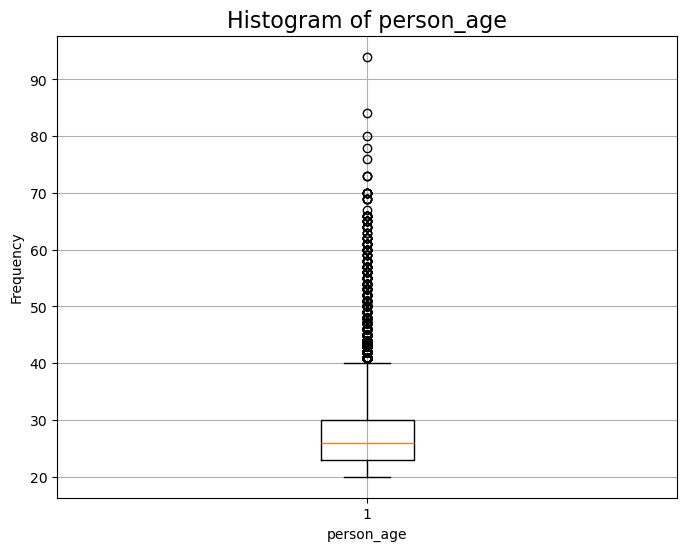

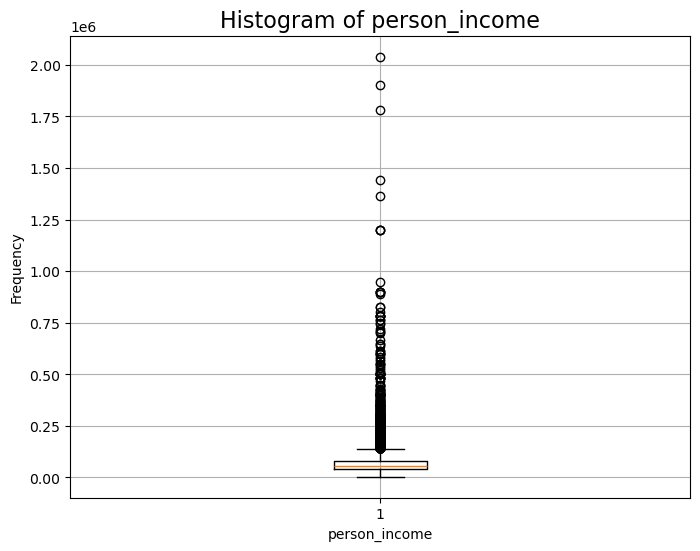

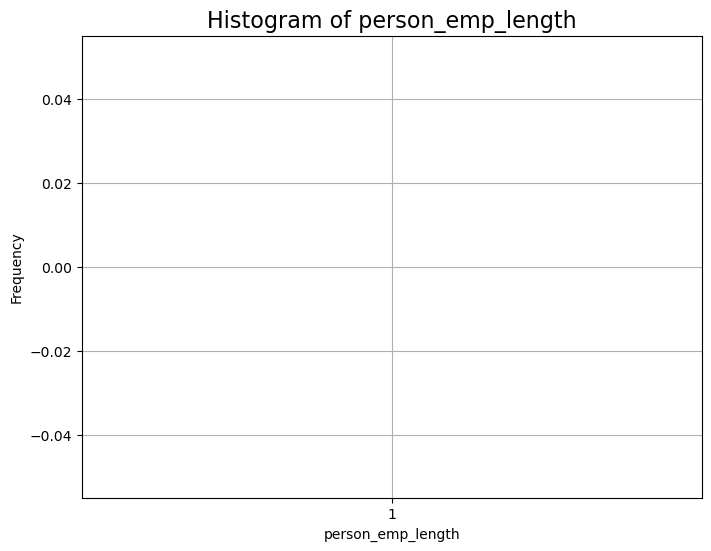

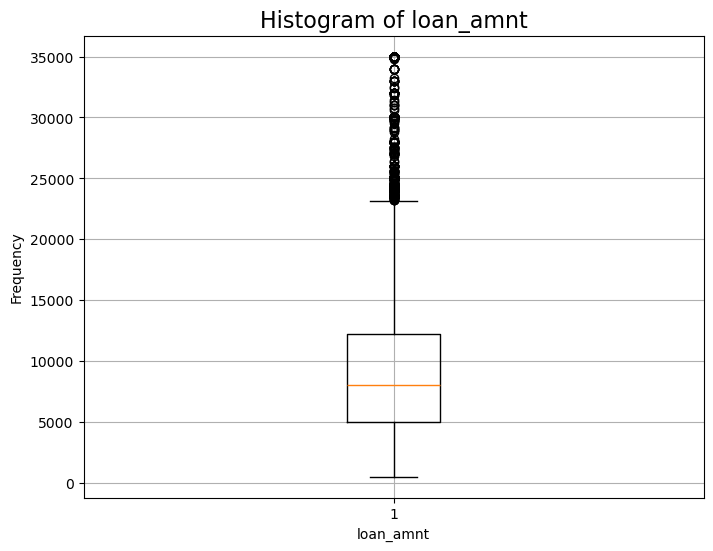

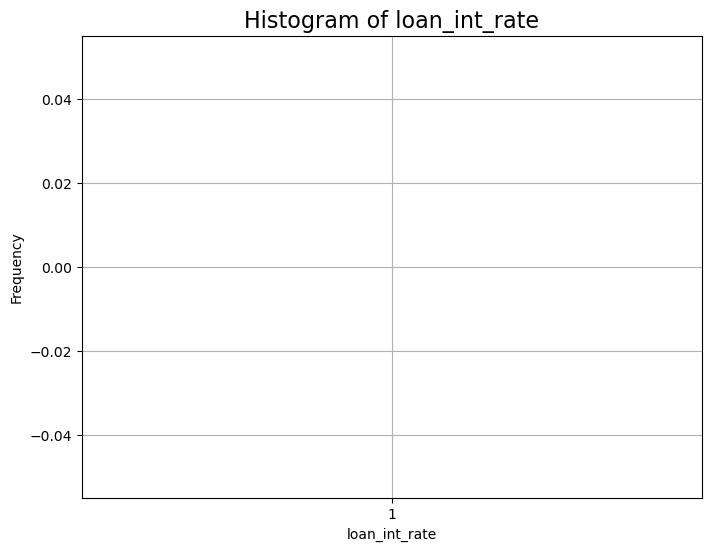

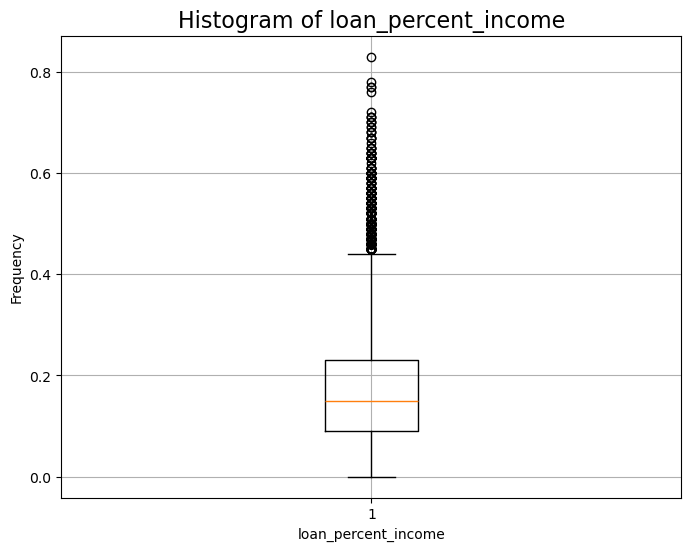

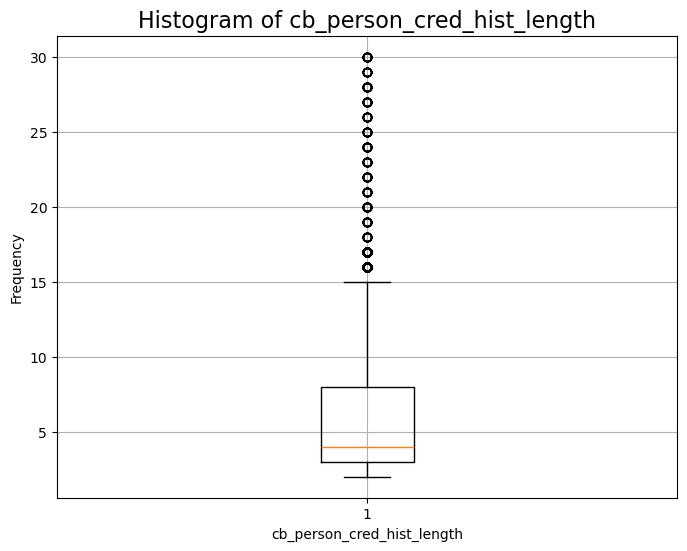

In [48]:
for column in numeric_features:
    plt.figure(figsize=(8, 6))
    plt.boxplot(credit_risk_dataset[column])
    plt.title(f'Histogram of {column}', fontsize=16)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

### Univariate Analysis

In [49]:
credit_risk_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32409 entries, 1 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   person_age                  32409 non-null  int64   
 1   person_income               32409 non-null  int64   
 2   person_home_ownership       32409 non-null  category
 3   person_emp_length           31522 non-null  float64 
 4   loan_intent                 32409 non-null  category
 5   loan_grade                  32409 non-null  category
 6   loan_amnt                   32409 non-null  int64   
 7   loan_int_rate               29315 non-null  float64 
 8   loan_status                 32409 non-null  bool    
 9   loan_percent_income         32409 non-null  float64 
 10  cb_person_default_on_file   32409 non-null  bool    
 11  cb_person_cred_hist_length  32409 non-null  int64   
dtypes: bool(2), category(3), float64(3), int64(4)
memory usage: 2.1 MB


#### Numeric

In [50]:
numeric_features = credit_risk_dataset.select_dtypes(
    include = ["int64", "float64"]
)

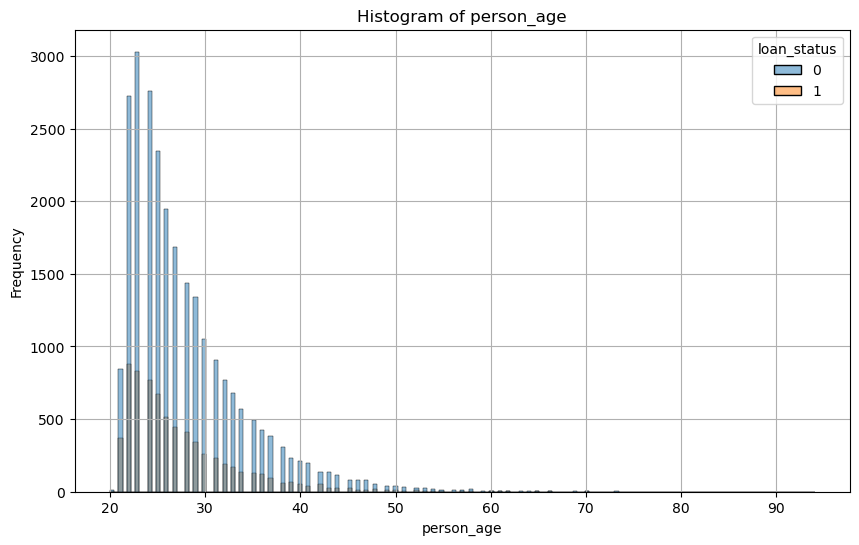

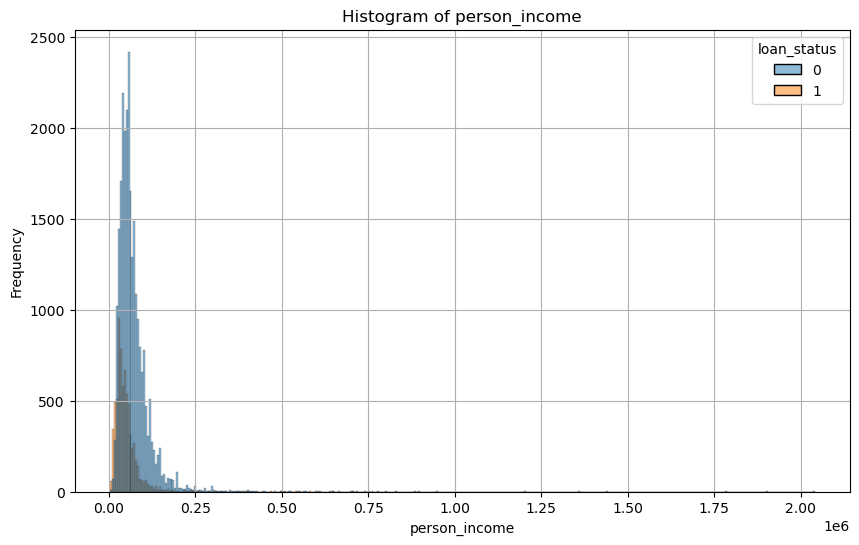

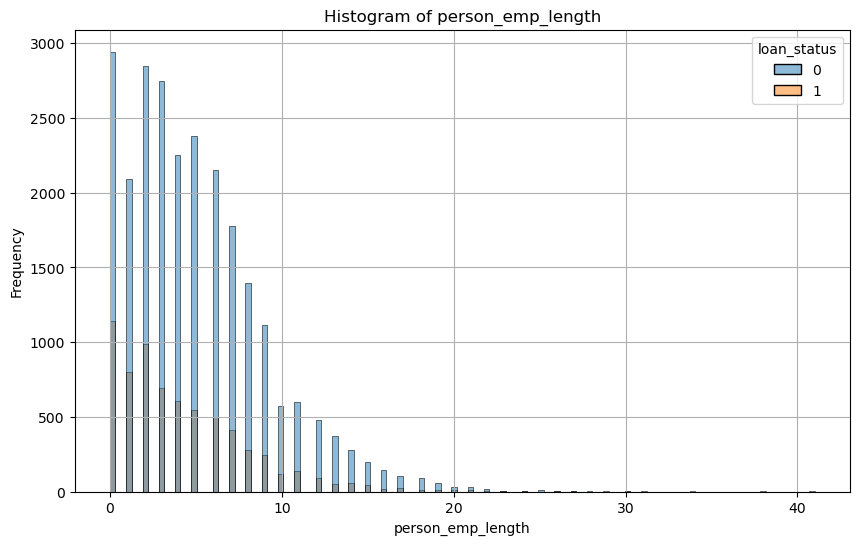

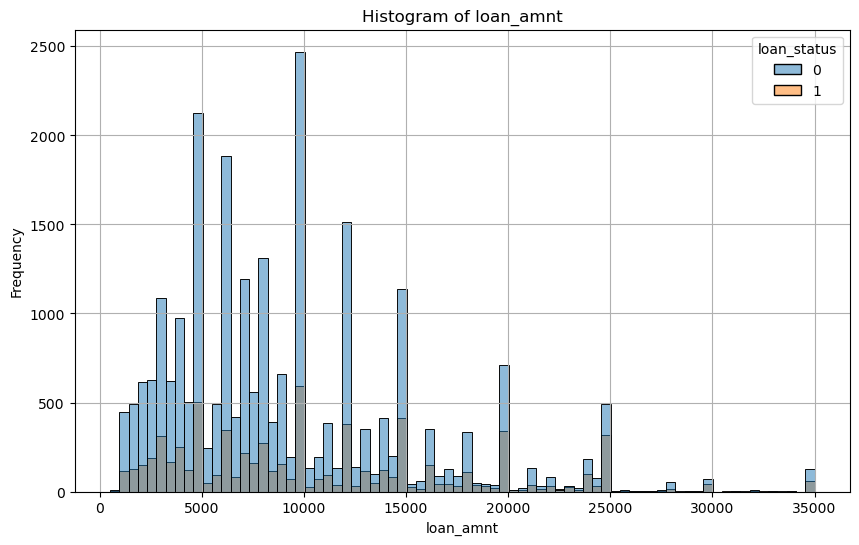

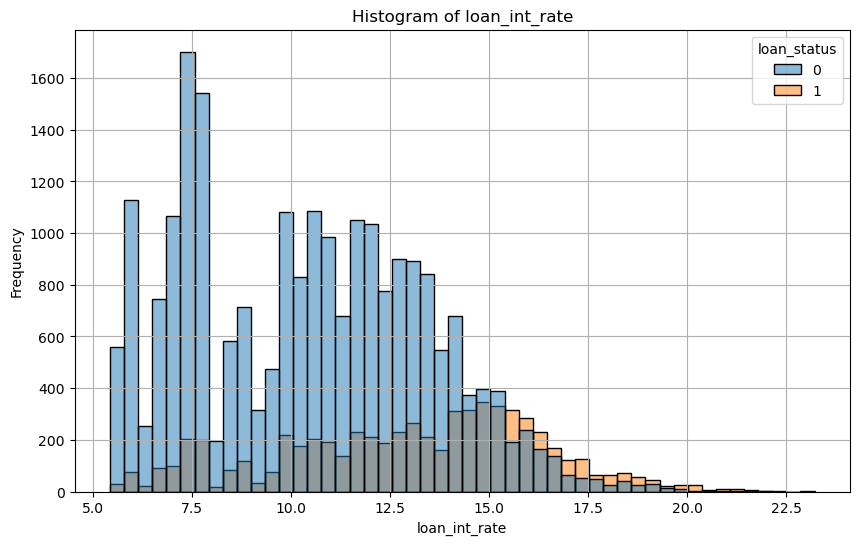

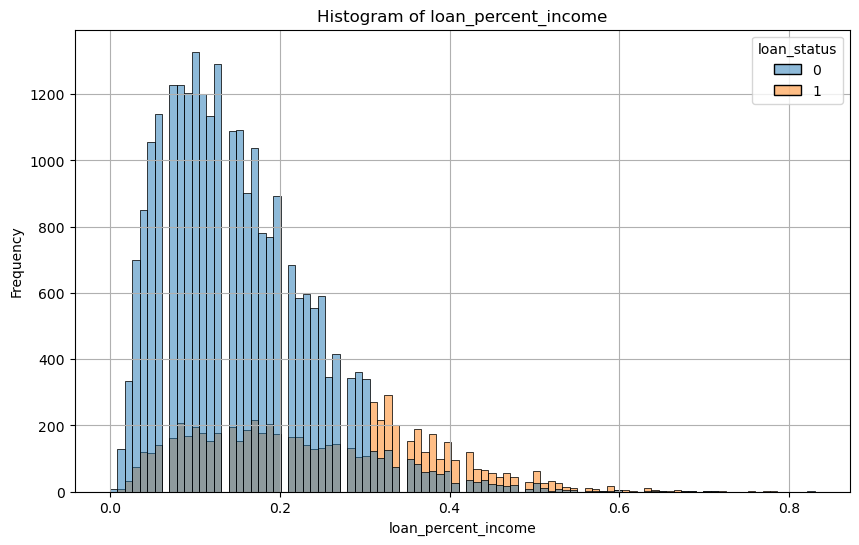

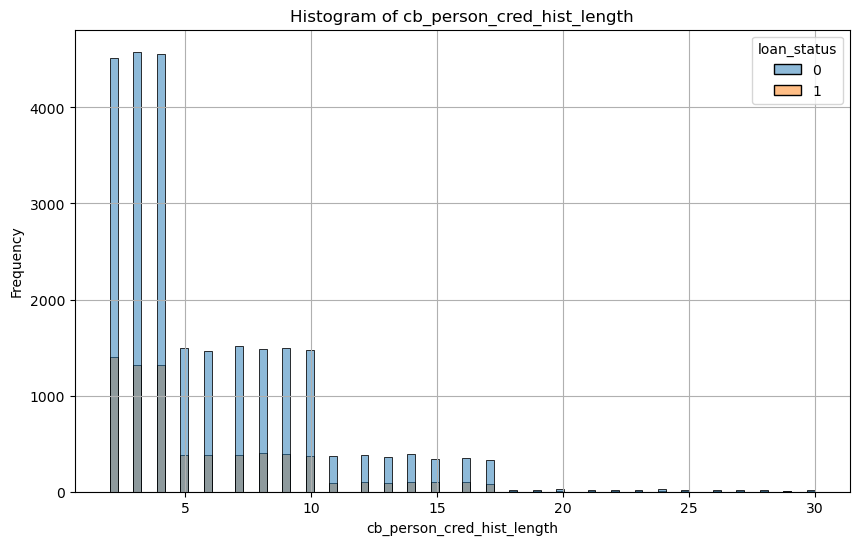

In [51]:
for numeric_feature in numeric_features:
    plt.figure(figsize=(10,6))
    sns.histplot(x= numeric_feature,
                 hue= target,
                 data= credit_risk_dataset)
    plt.title(f"Histogram of {numeric_feature}")
    plt.xlabel(numeric_feature)
    plt.ylabel("Frequency")
    plt.grid(visible=True)

#### Categorical

In [52]:
categorical_features = credit_risk_dataset.select_dtypes(include=['category']).columns

In [53]:
categorical_features

Index(['person_home_ownership', 'loan_intent', 'loan_grade'], dtype='object')

In [54]:
for categorical_feature in categorical_features:
    print(categorical_feature)

person_home_ownership
loan_intent
loan_grade


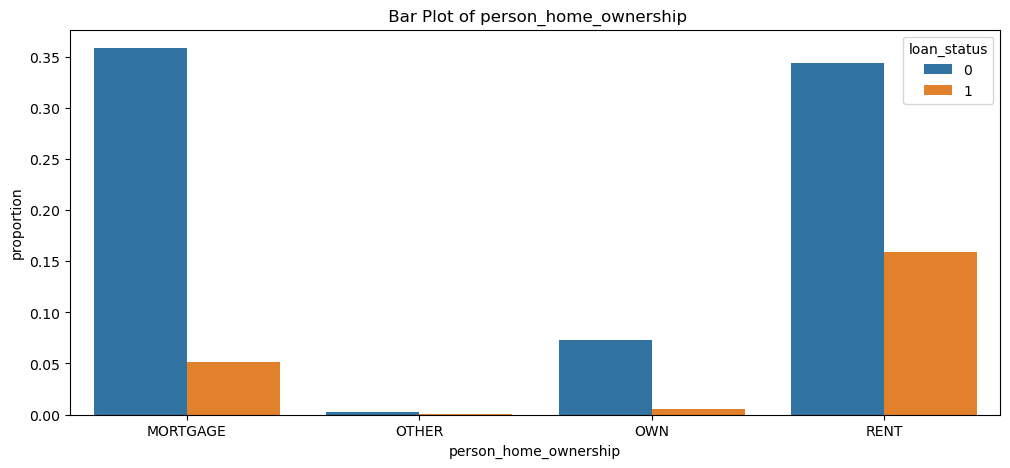

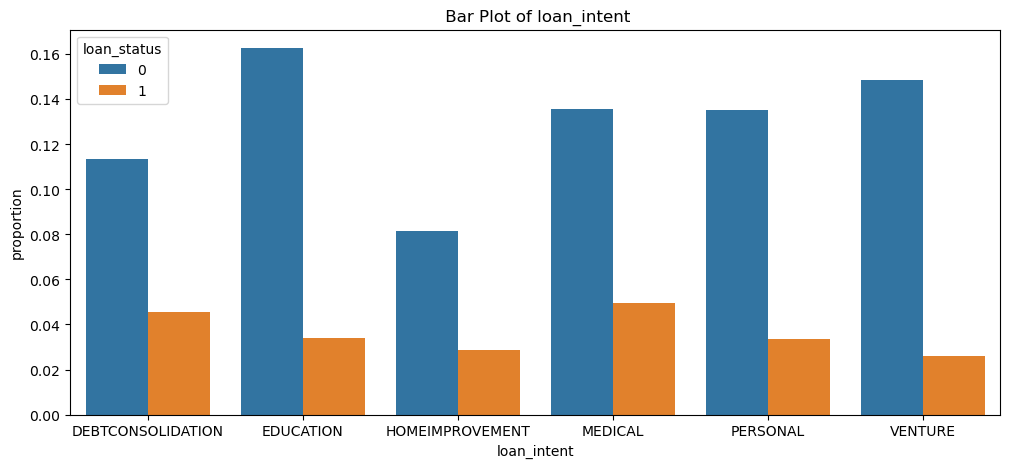

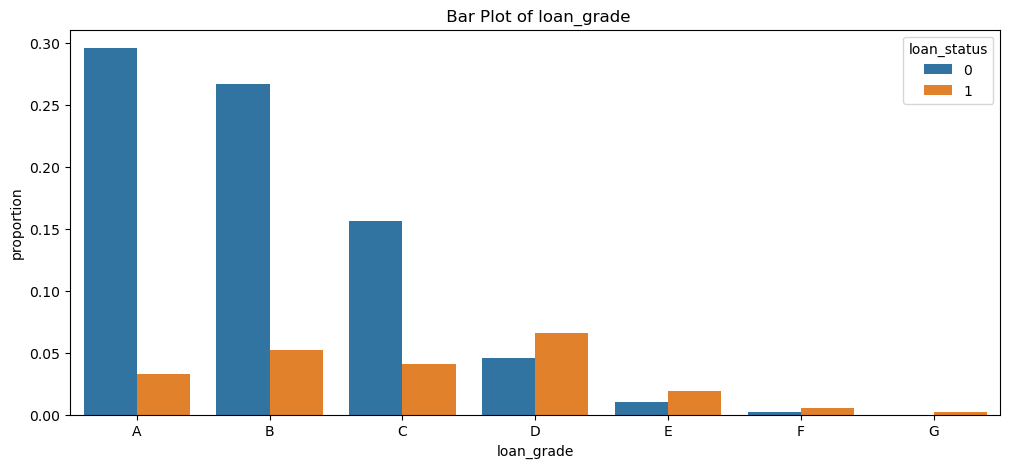

In [55]:
for categorical_feature in categorical_features:
    plt.figure(
        figsize=(12,5)
    )
    sns.countplot(
        x= categorical_feature,
        data= credit_risk_dataset,
        hue = target,
        stat = 'proportion')
    plt.title(f" Bar Plot of {categorical_feature}")

In [56]:
credit_risk_dataset.person_home_ownership.value_counts().values

array([16374, 13366,  2563,   106])

In [57]:
credit_risk_dataset.person_home_ownership.value_counts().index

CategoricalIndex(['RENT', 'MORTGAGE', 'OWN', 'OTHER'], categories=['MORTGAGE', 'OTHER', 'OWN', 'RENT'], ordered=False, dtype='category', name='person_home_ownership')

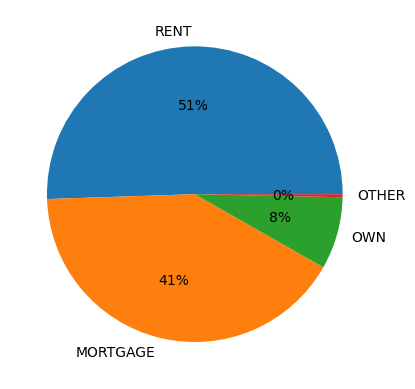

In [58]:
sns.color_palette('dark')
plt.pie(
    x=credit_risk_dataset.person_home_ownership.value_counts().values,
    labels=credit_risk_dataset.person_home_ownership.value_counts().index,
    autopct='%.0f%%',
);

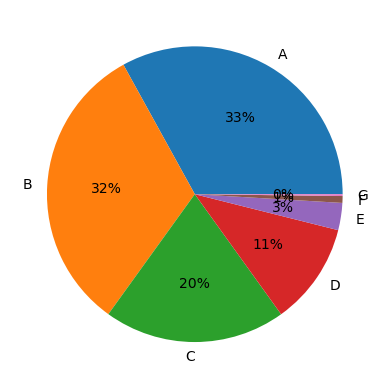

In [59]:
sns.color_palette('dark')
plt.pie(
    x=credit_risk_dataset.loan_grade.value_counts().values,
    labels=credit_risk_dataset.loan_grade.value_counts().index,
    autopct='%.0f%%',
);


#### Bool

In [60]:
bool_features = credit_risk_dataset.select_dtypes(
    include = 'bool'
    ).columns

In [61]:
bool_features

Index(['loan_status', 'cb_person_default_on_file'], dtype='object')

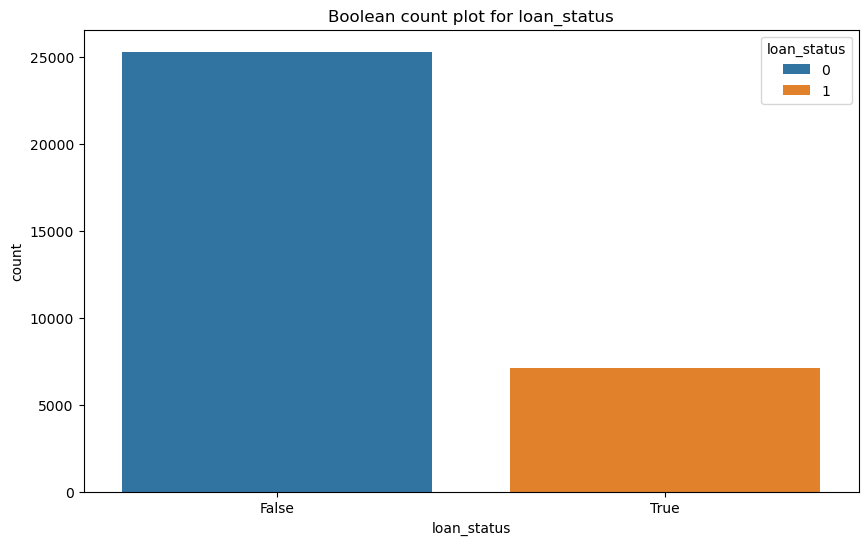

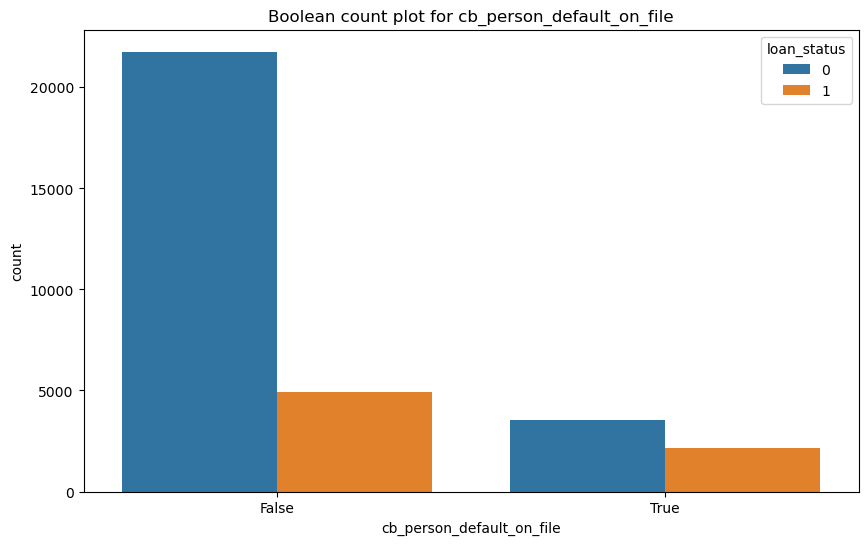

In [62]:
for bool_feature in bool_features:
    plt.figure(figsize=(10,6))
    sns.countplot(
        data= credit_risk_dataset,
        x= bool_feature,
        hue=target
        )
    plt.title(f"Boolean count plot for {bool_feature}")

#### There is an imbalance in the target variable.

### Bivariate Analysis

C:\Users\billy\AppData\Local\Temp\ipykernel_37484\3386080503.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(


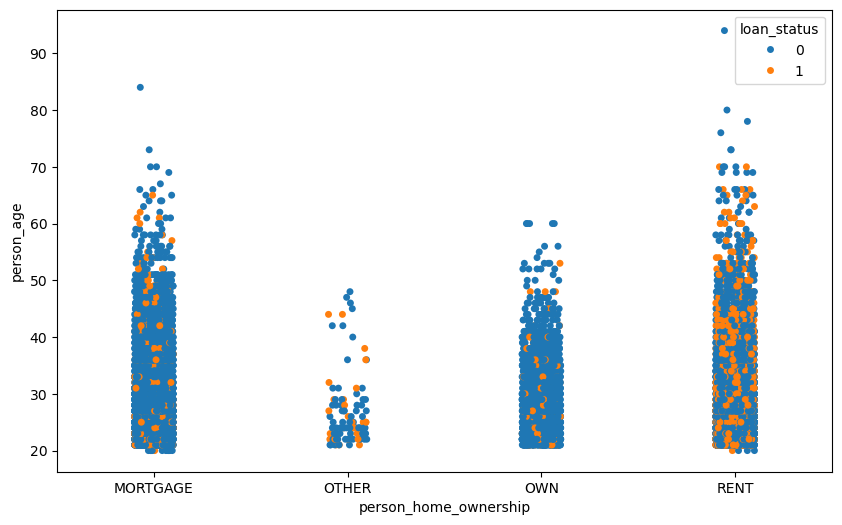

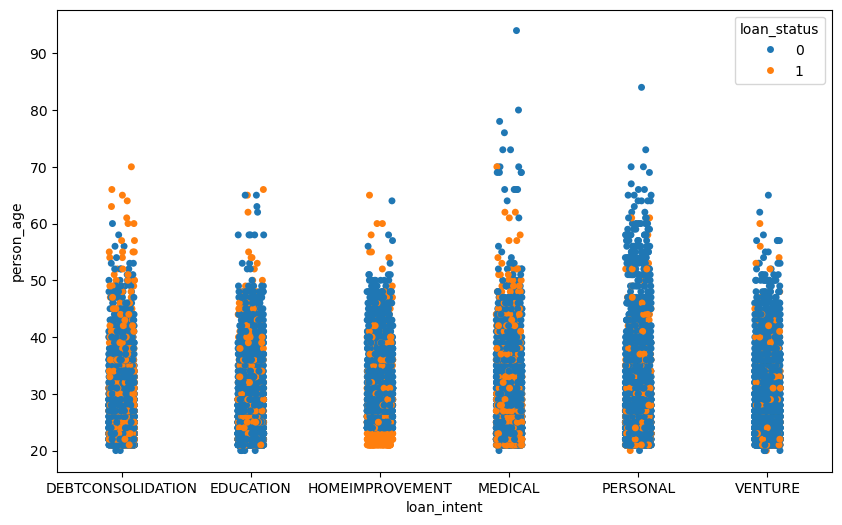

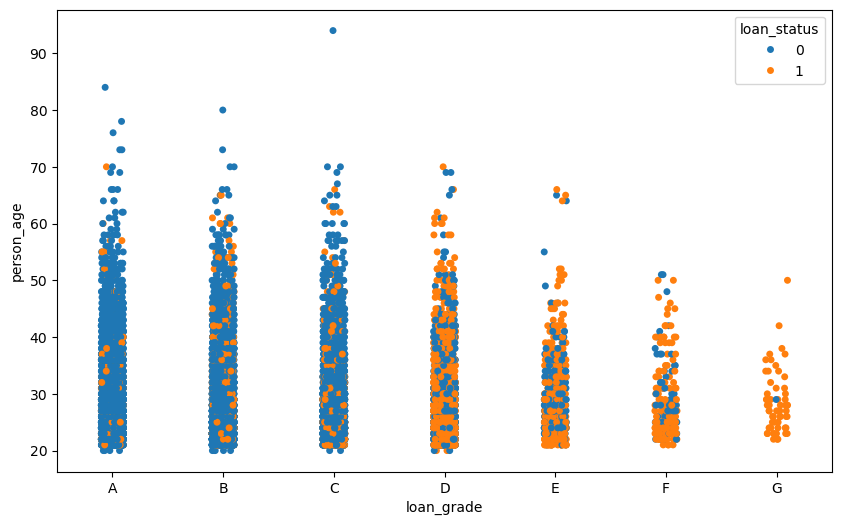

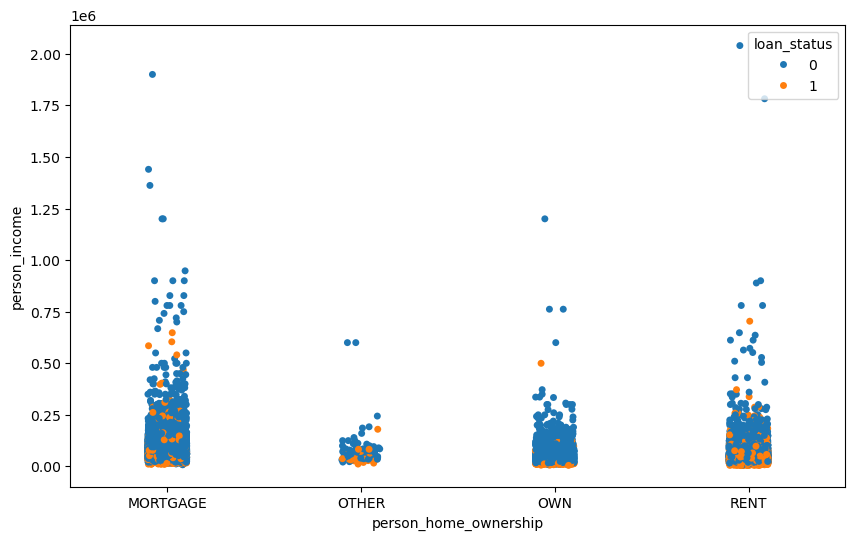

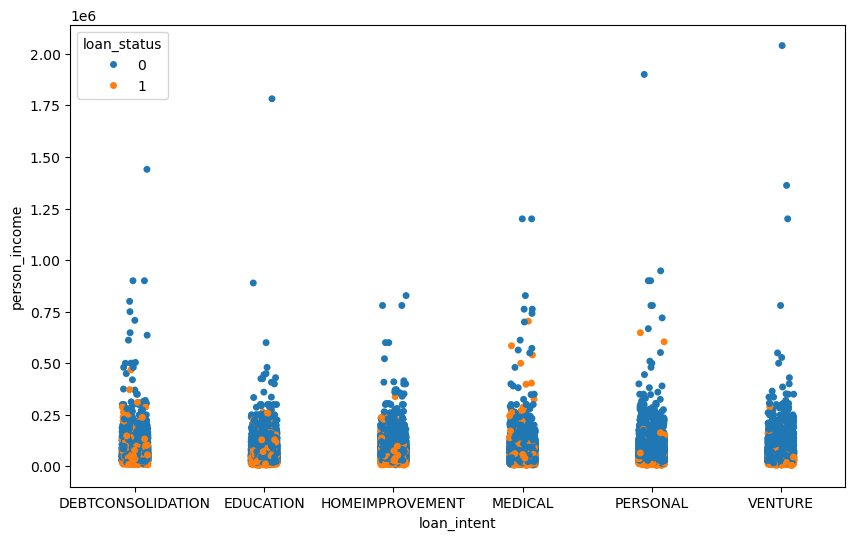

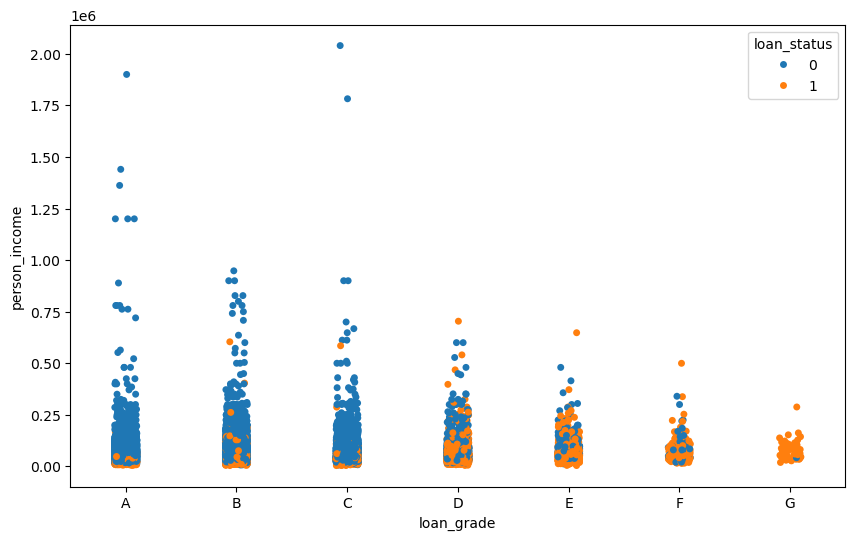

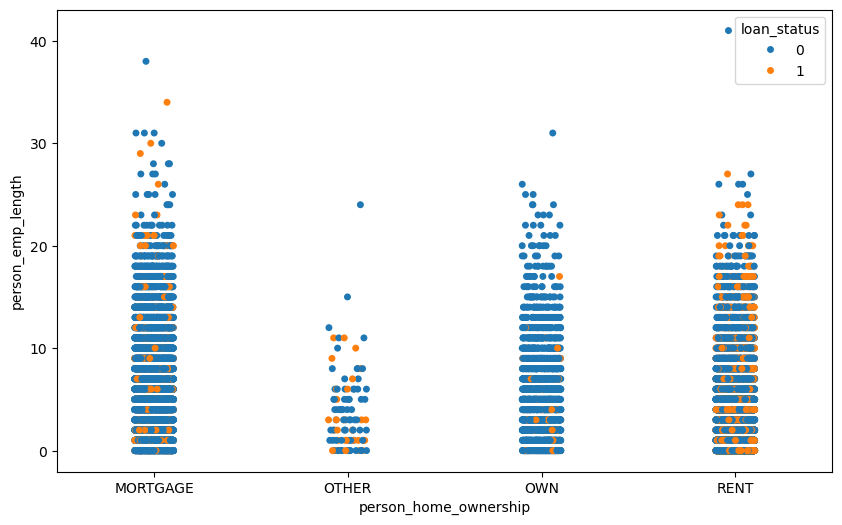

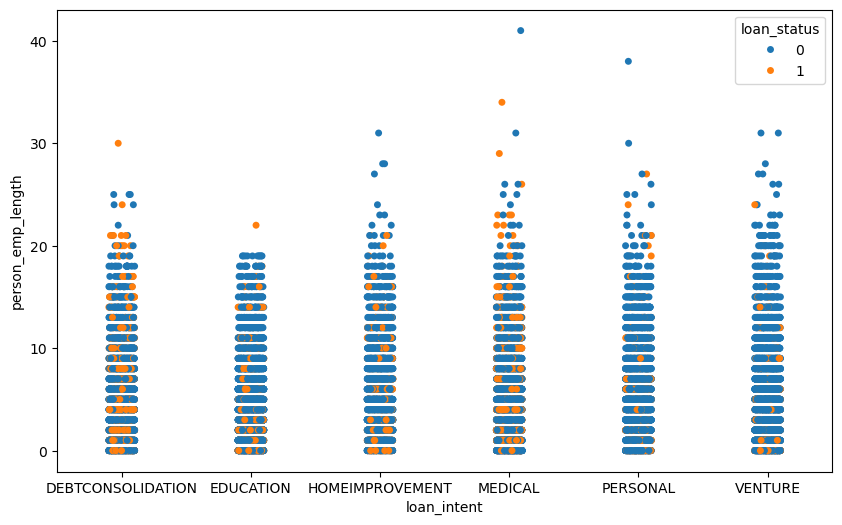

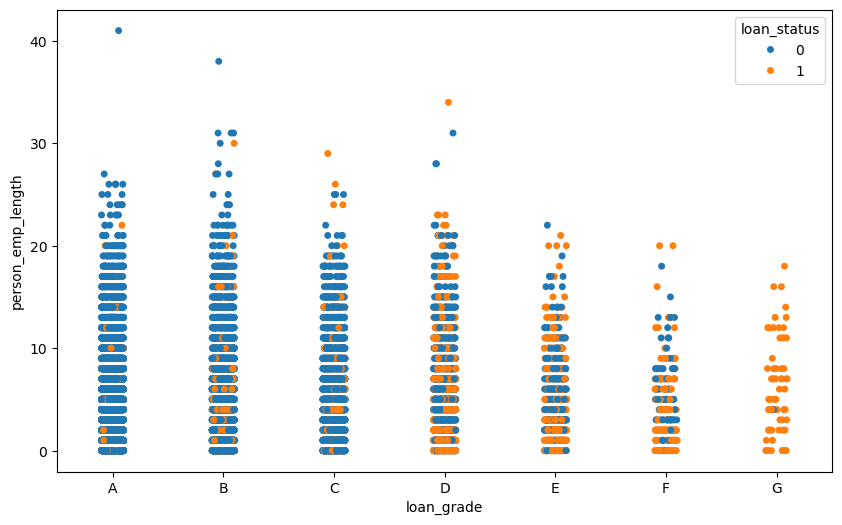

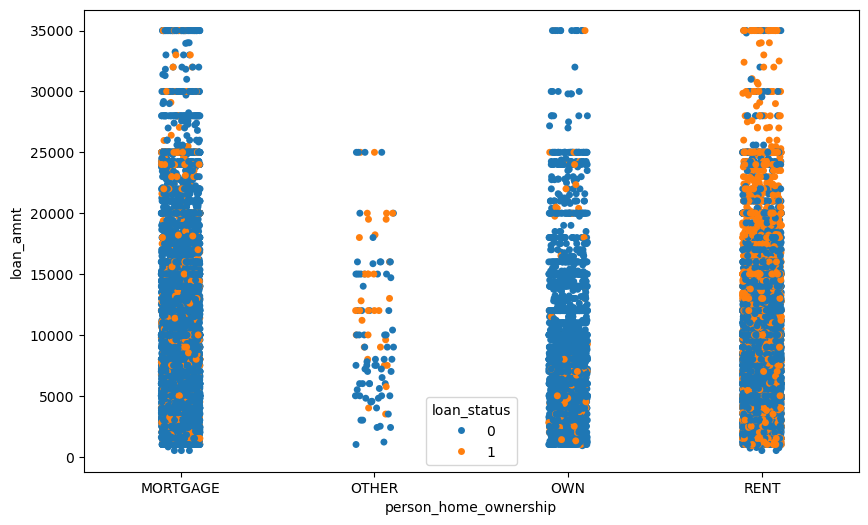

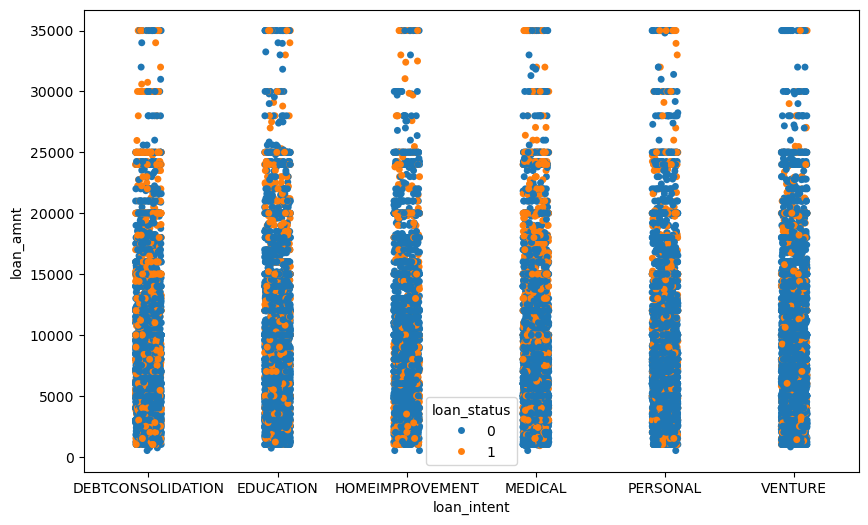

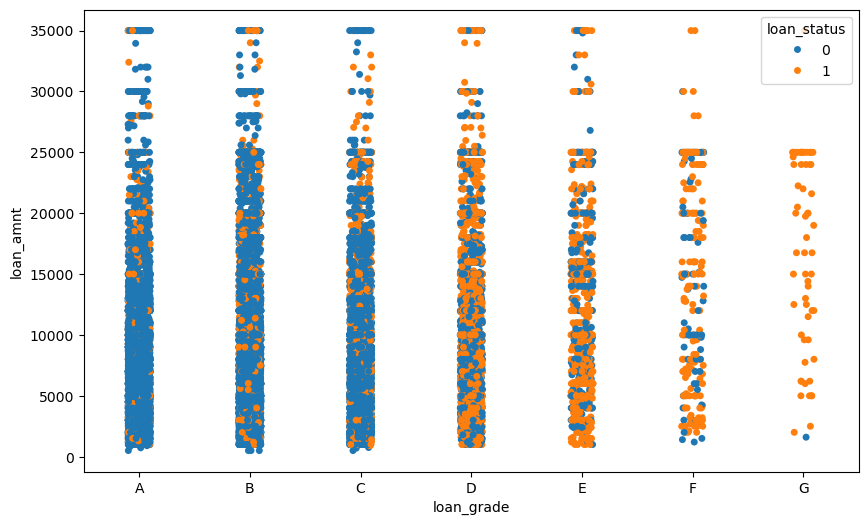

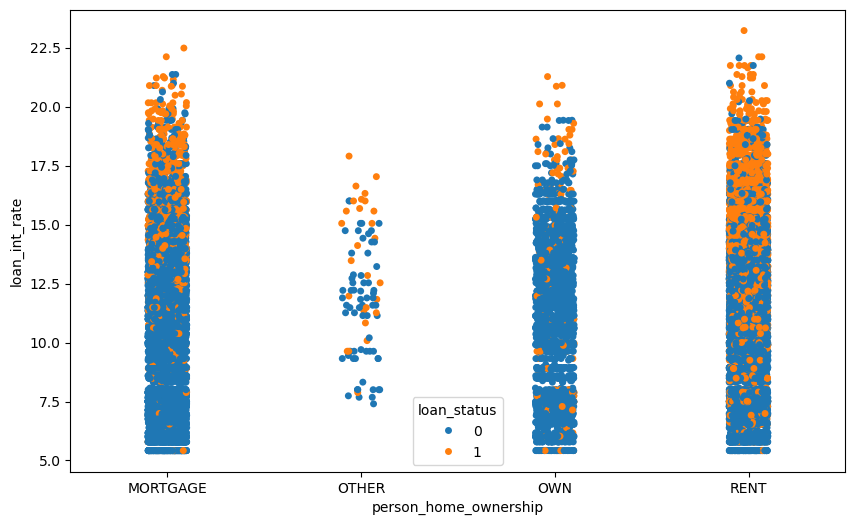

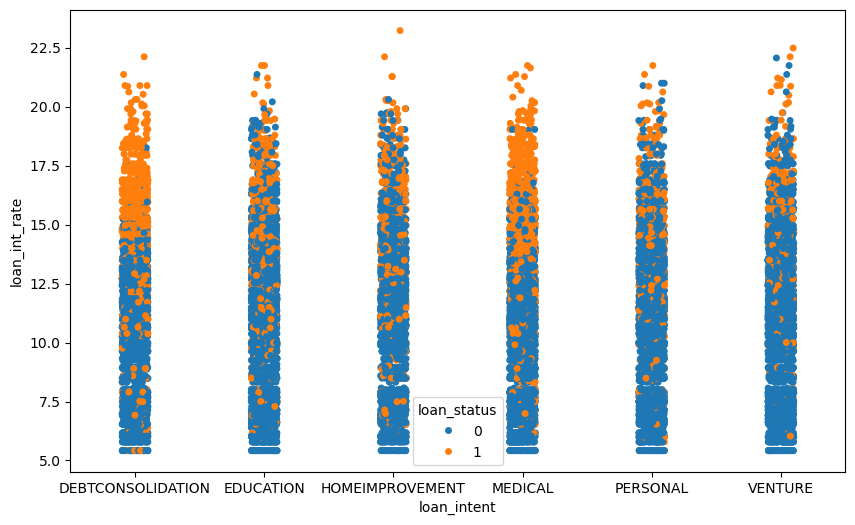

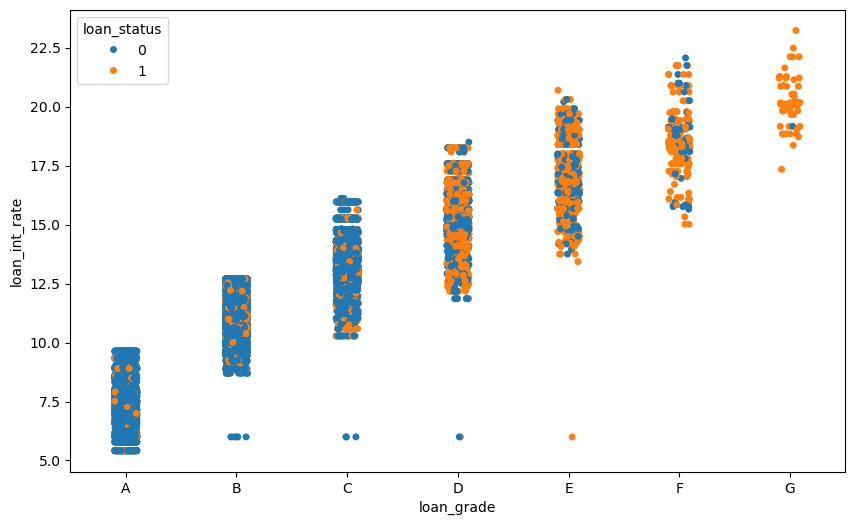

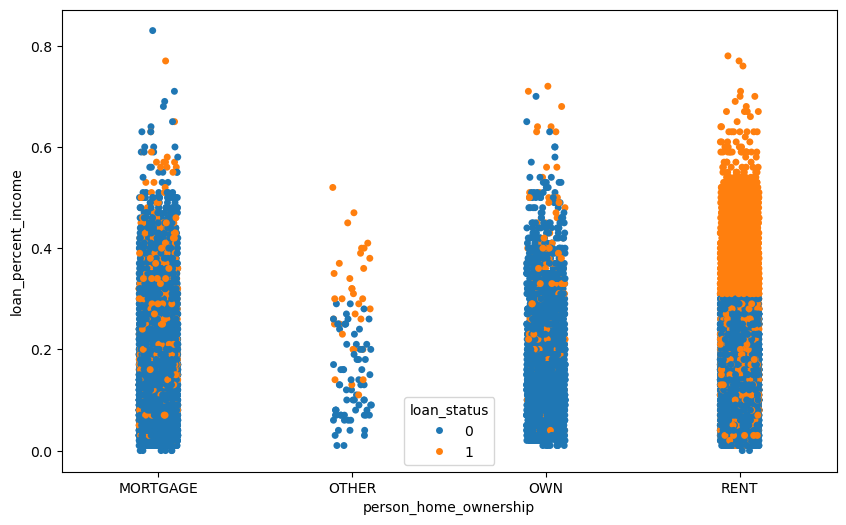

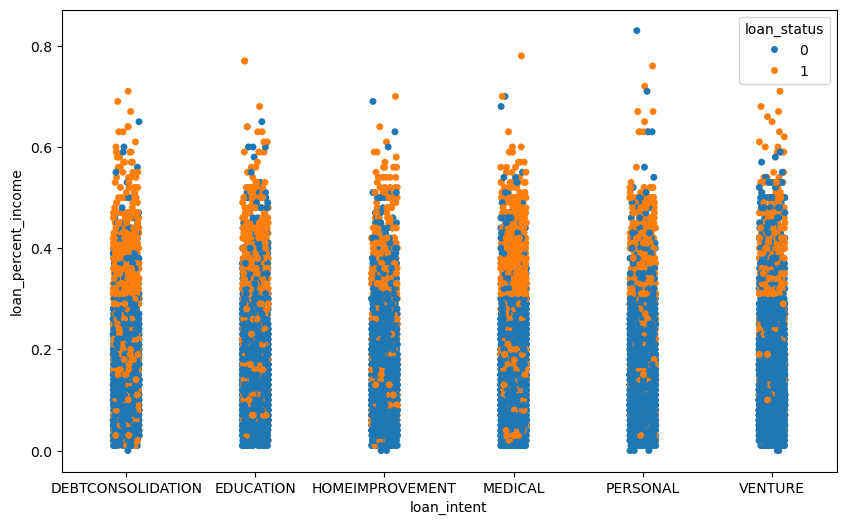

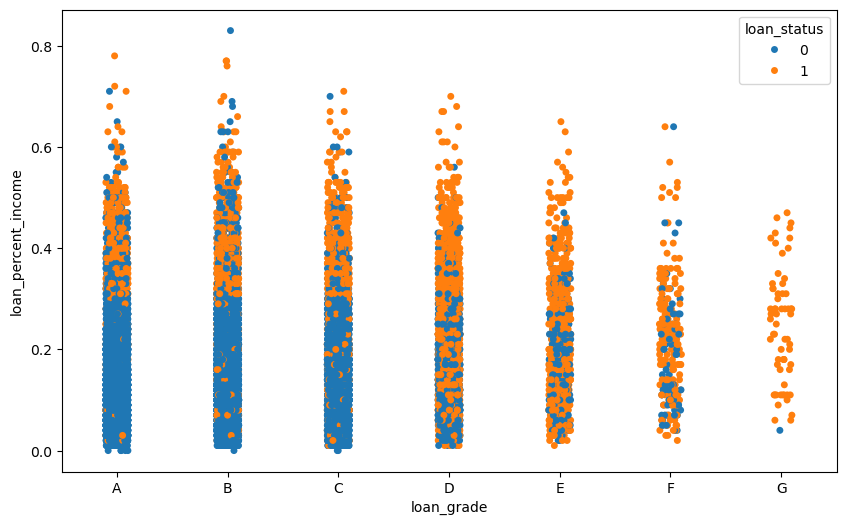

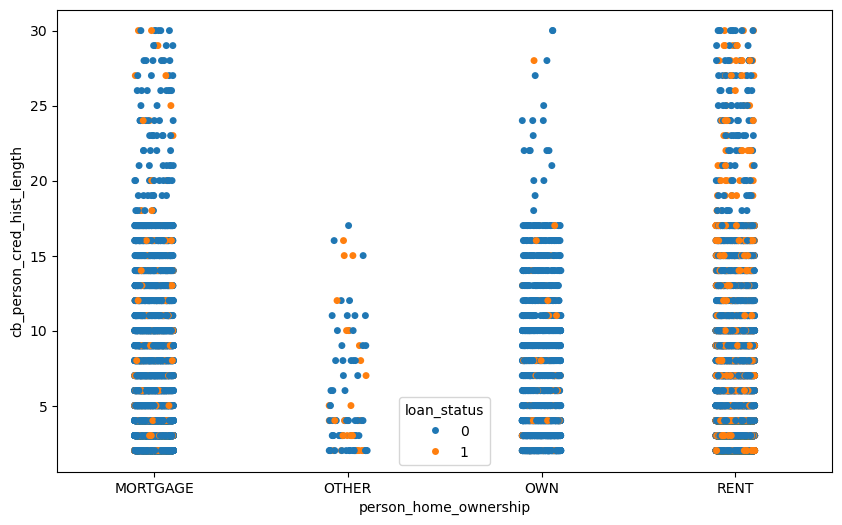

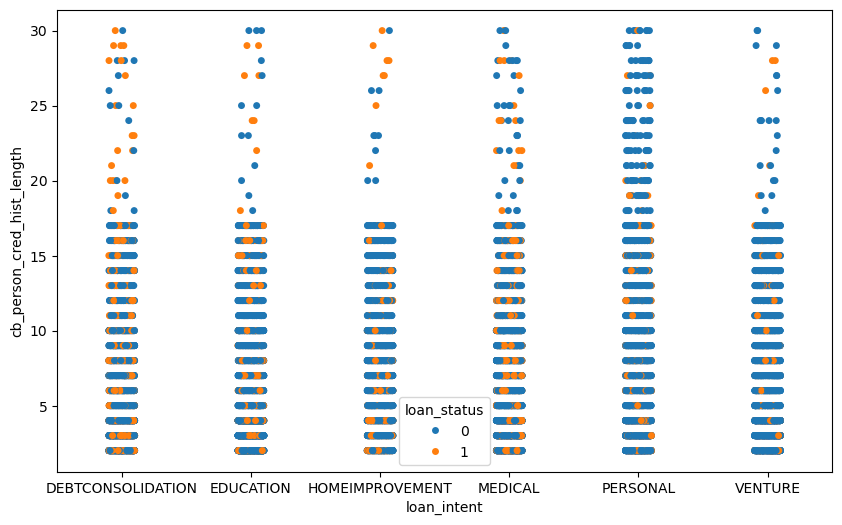

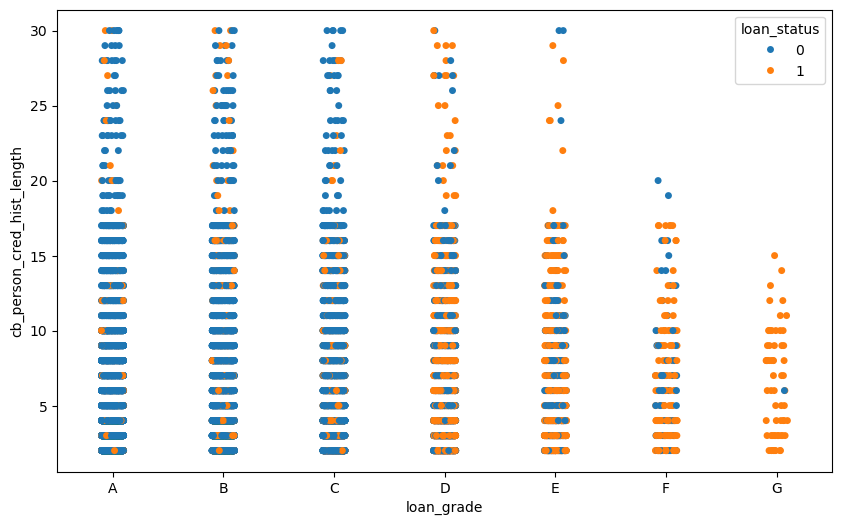

In [63]:
for numeric_feature in numeric_features:
    for categorical_feature in categorical_features:
        plt.figure(
            figsize=(10,6)
            )
        sns.stripplot(
            data= credit_risk_dataset,
            x= categorical_feature,
            y= numeric_feature,
            hue= target
        )

In [64]:
credit_risk_dataset.person_age.sort_values(ascending=False)

32416    94
32506    84
32422    80
32355    78
32534    76
         ..
1313     20
15417    20
12943    20
14827    20
13918    20
Name: person_age, Length: 32409, dtype: int64

C:\Users\billy\AppData\Local\Temp\ipykernel_37484\2988859579.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(


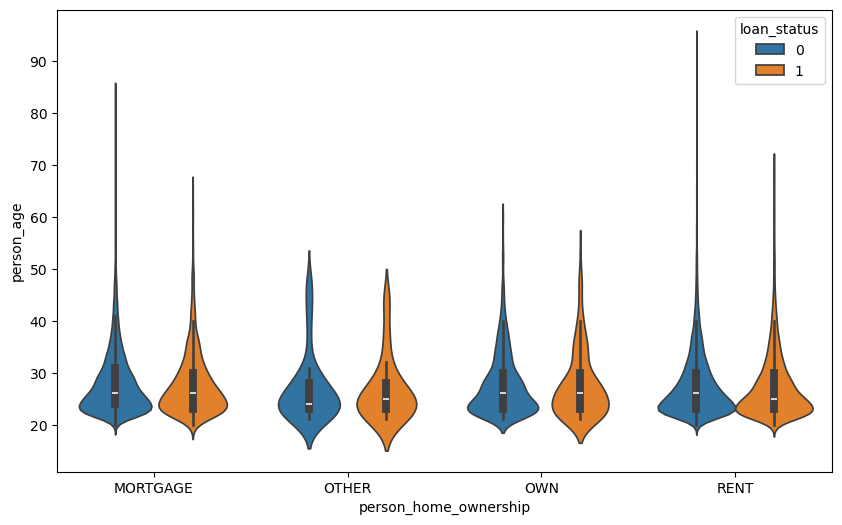

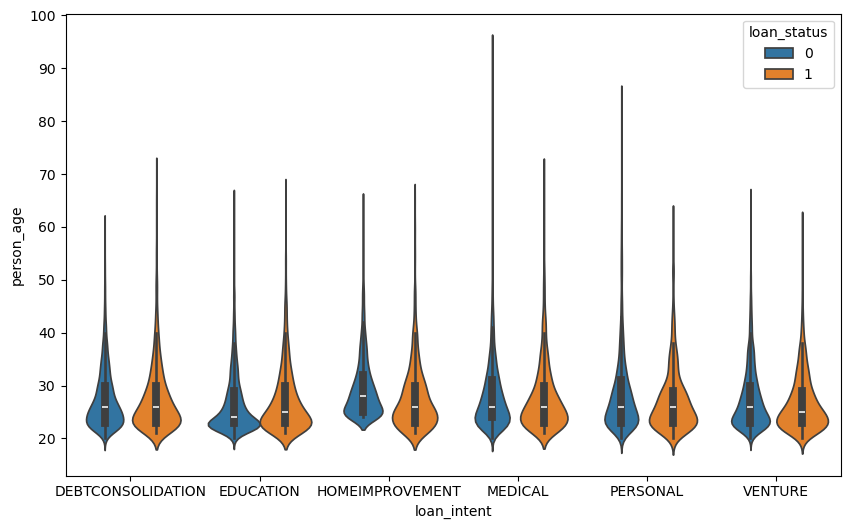

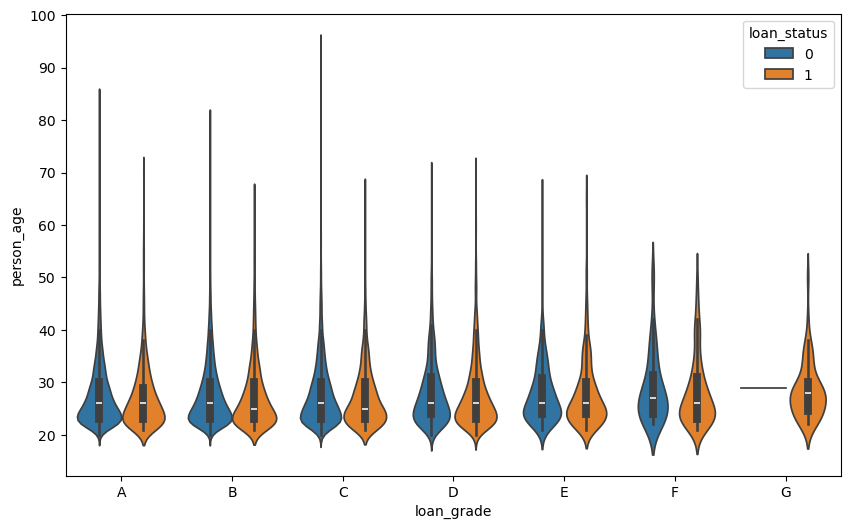

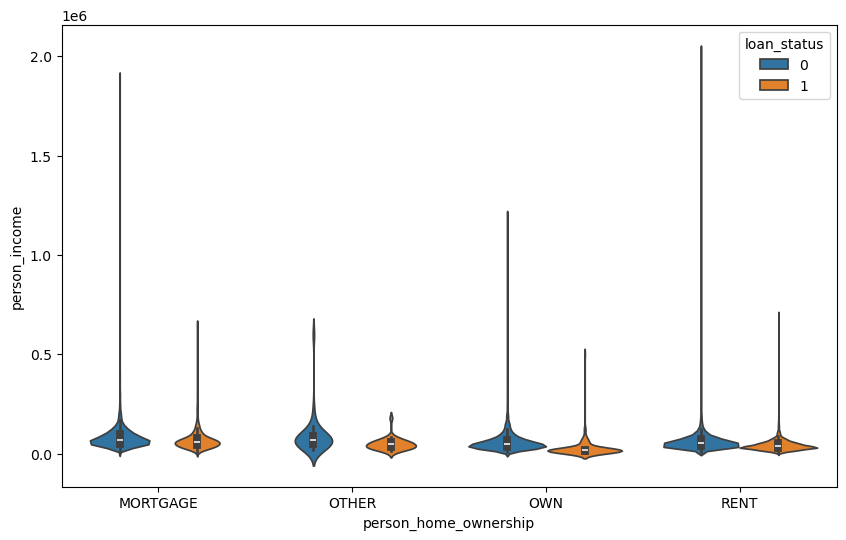

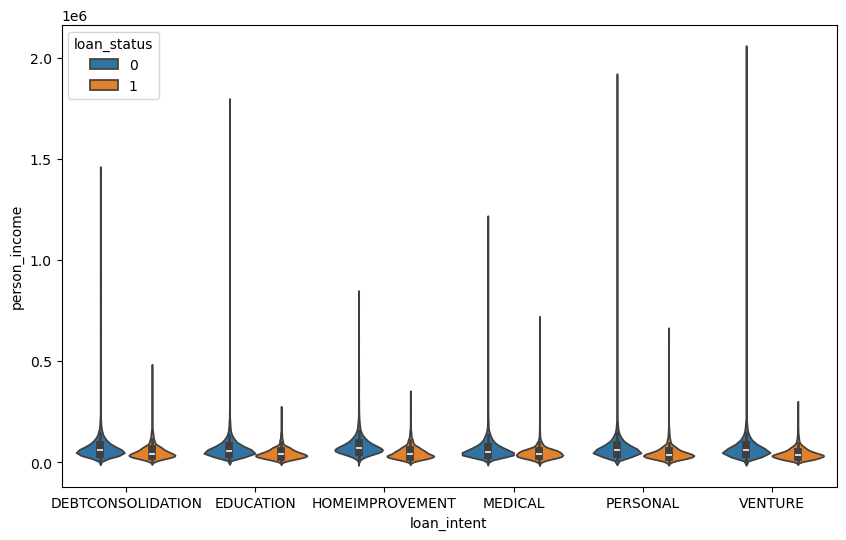

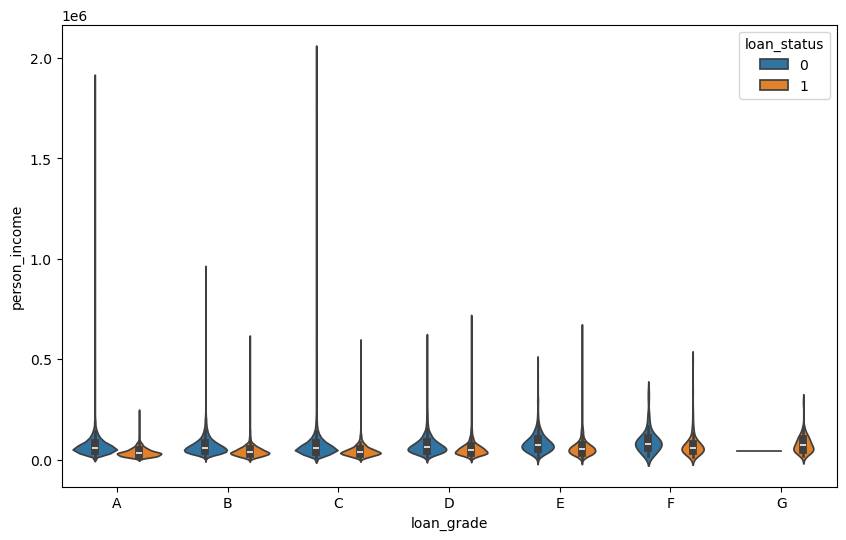

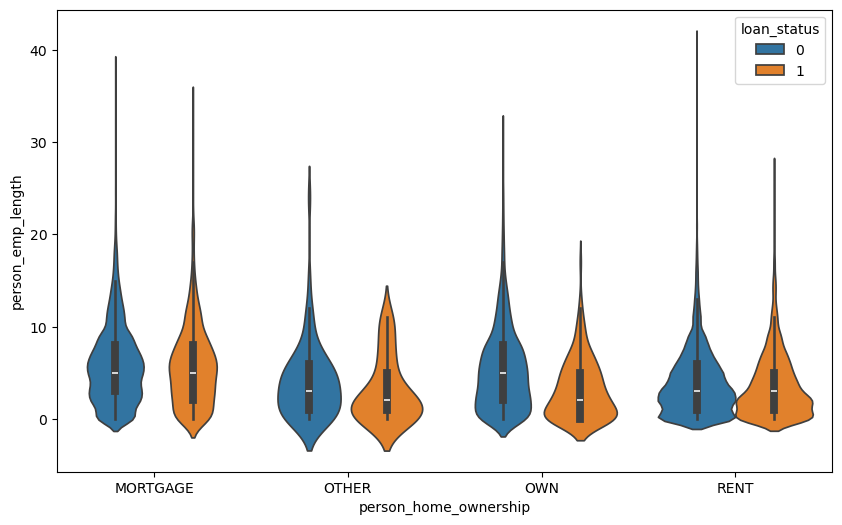

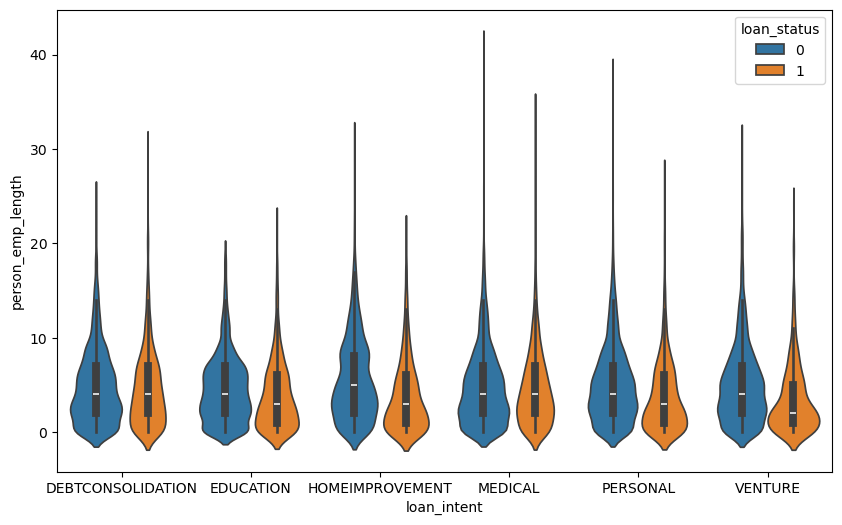

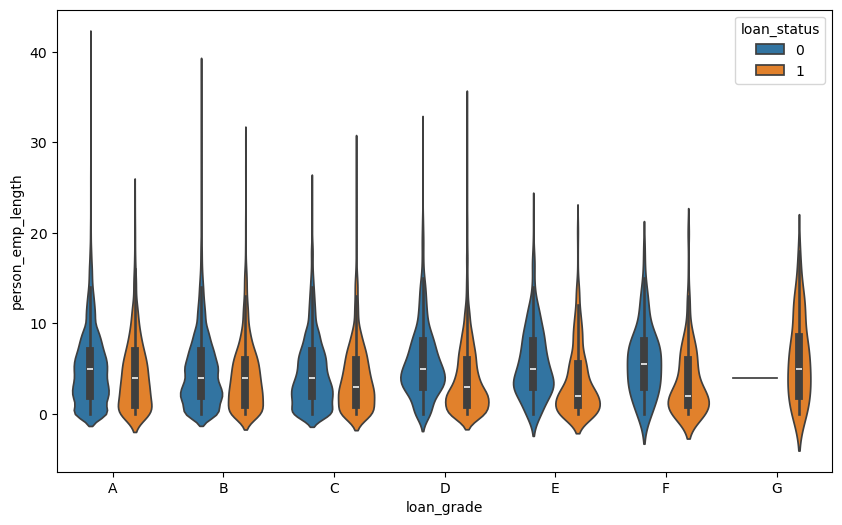

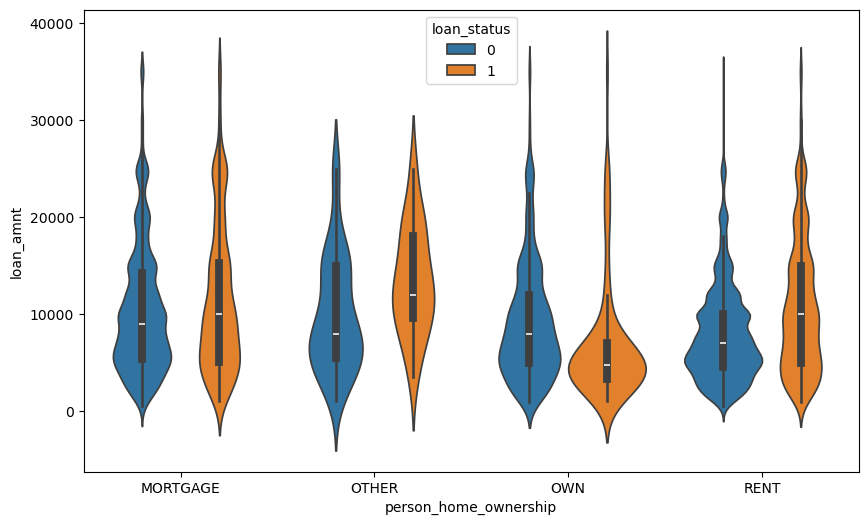

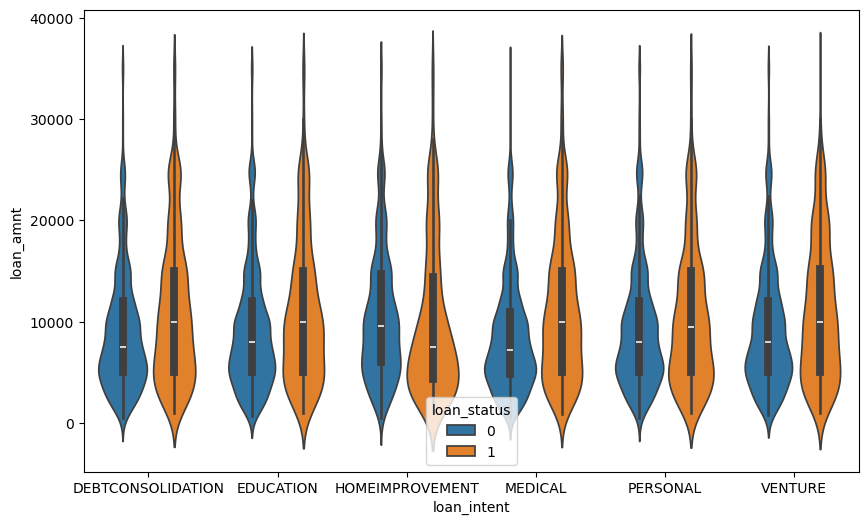

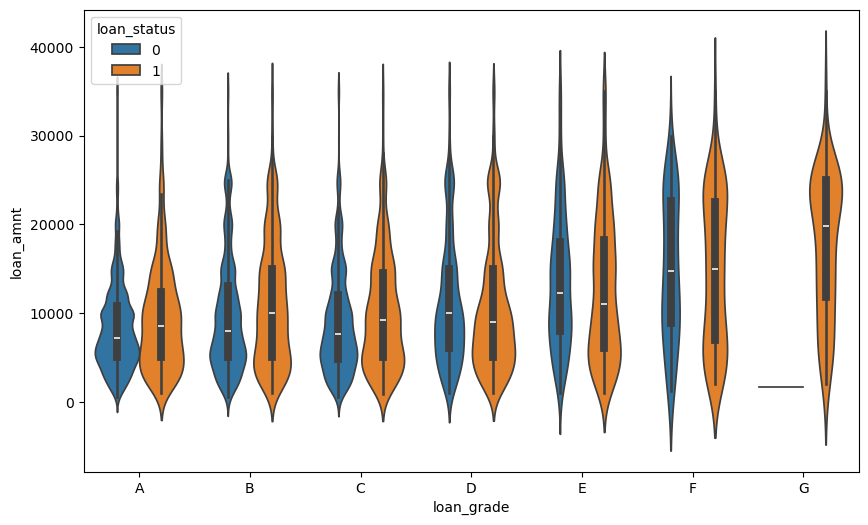

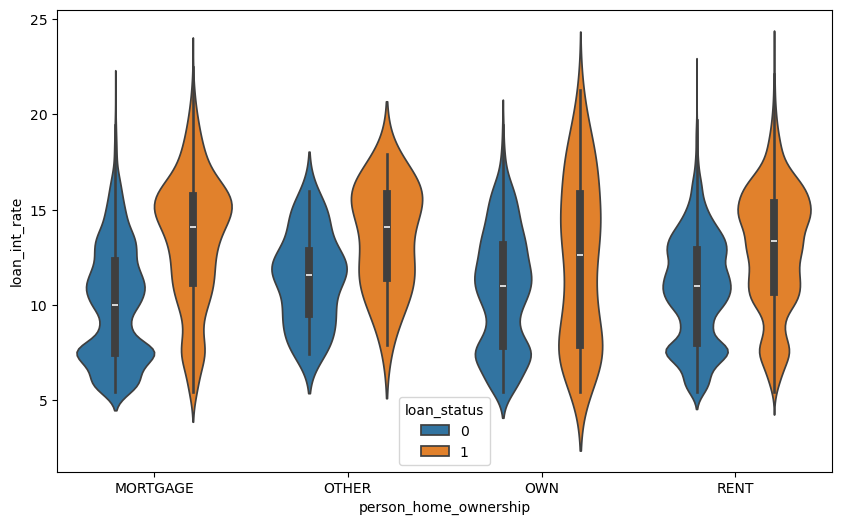

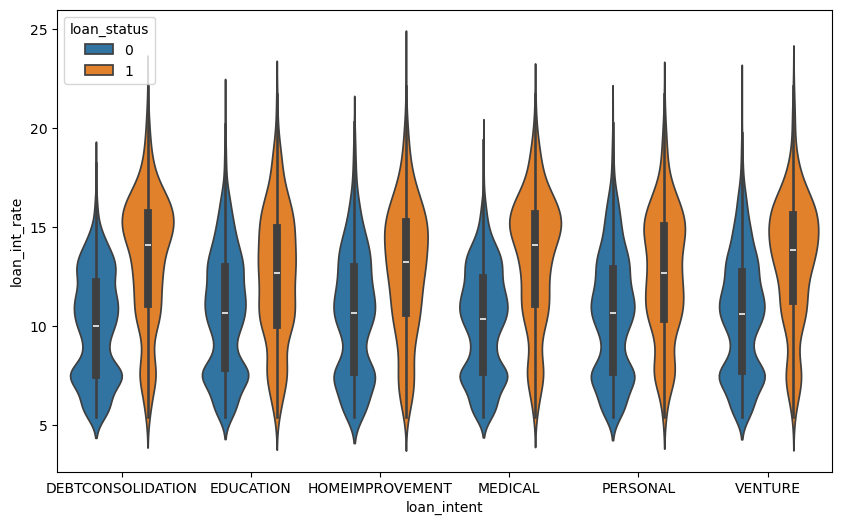

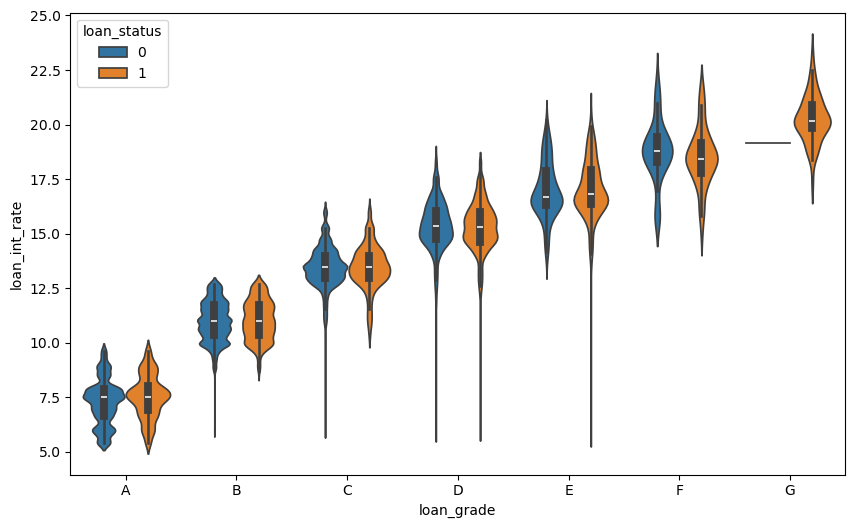

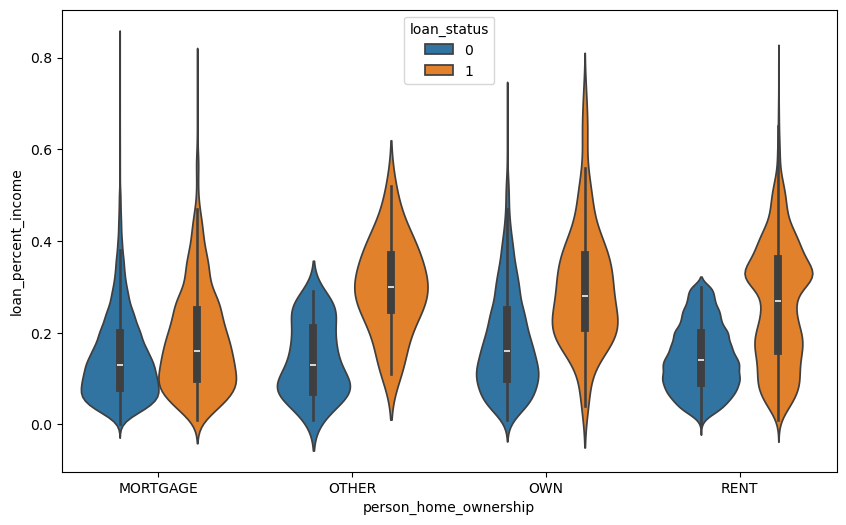

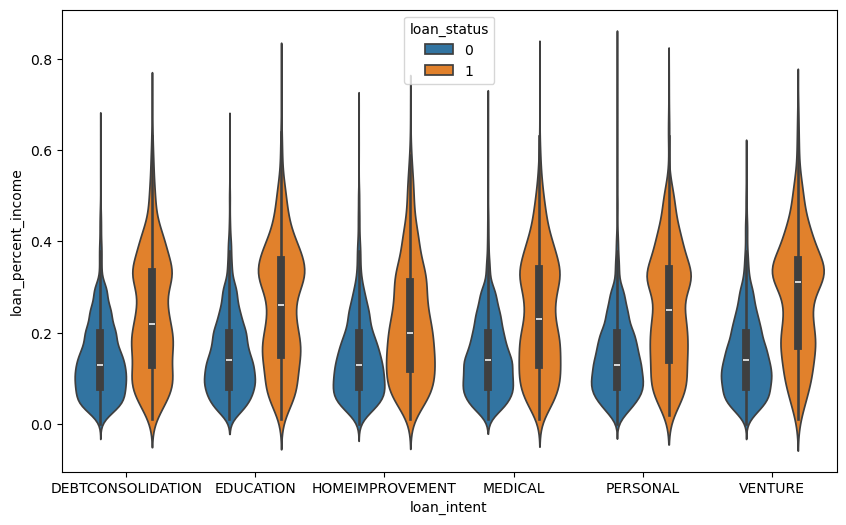

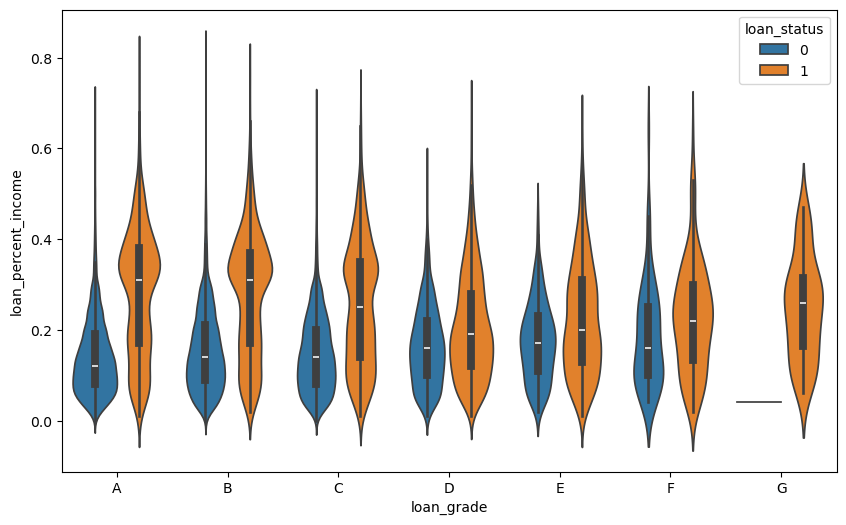

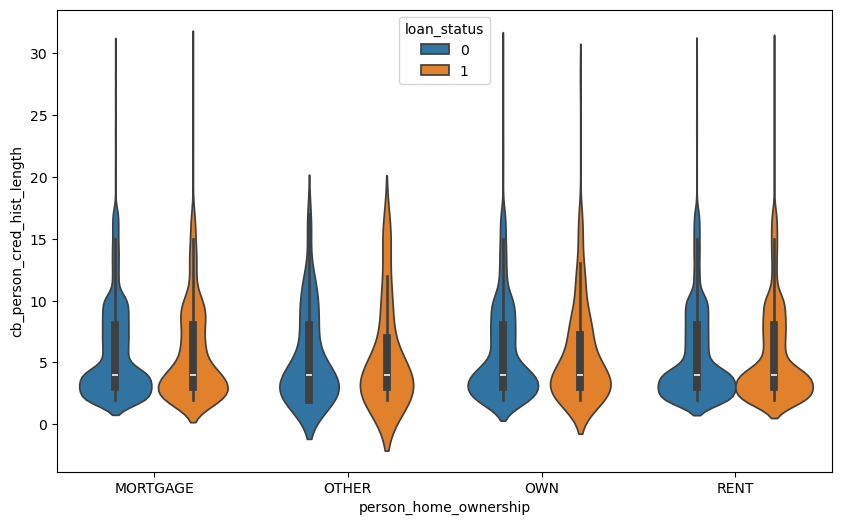

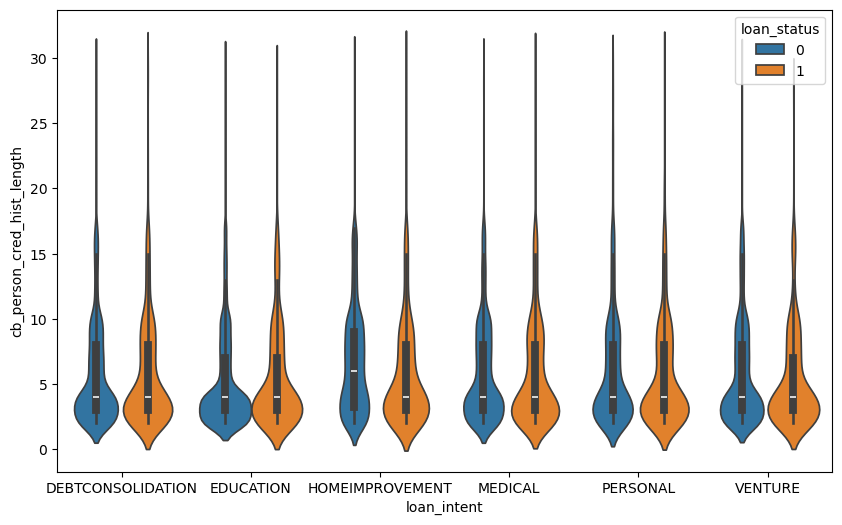

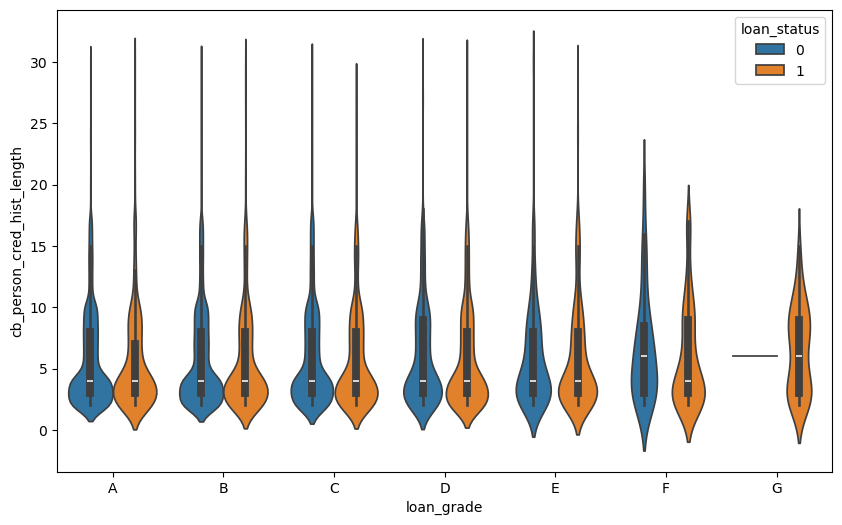

In [65]:
for numeric_feature in numeric_features:
    for categorical_feature in categorical_features:
        plt.figure(
            figsize=(10,6)
            )
        sns.violinplot(
            data= credit_risk_dataset,
            x= categorical_feature,
            y= numeric_feature,
            hue= target
        )

C:\Users\billy\AppData\Local\Temp\ipykernel_37484\3881243454.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(


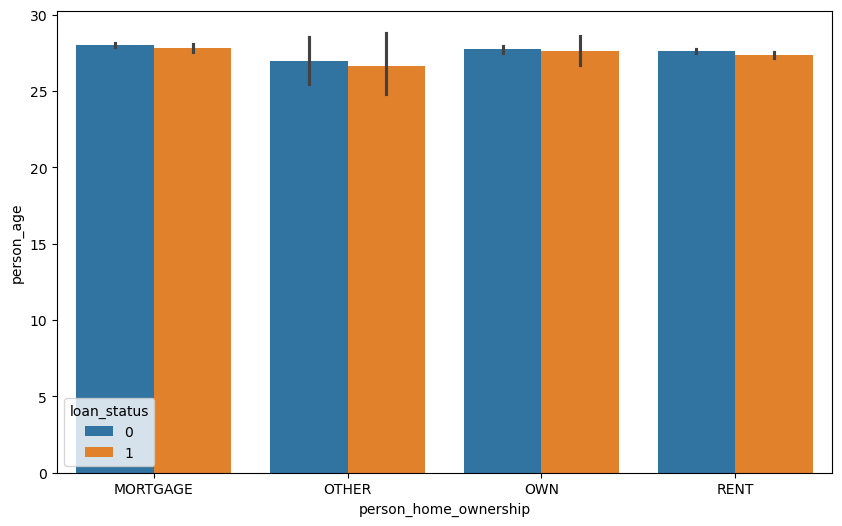

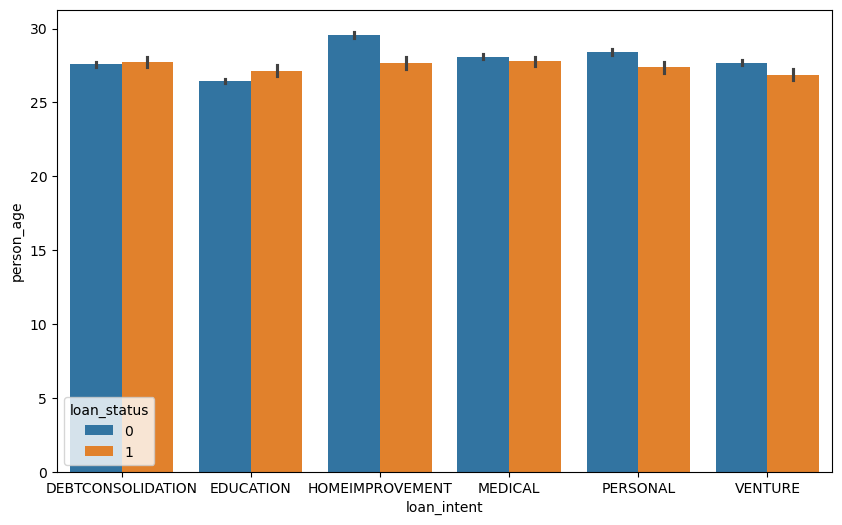

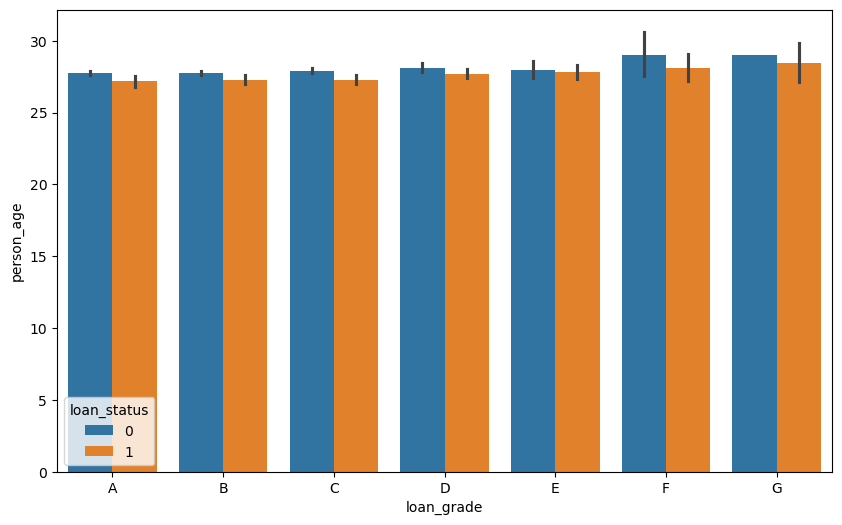

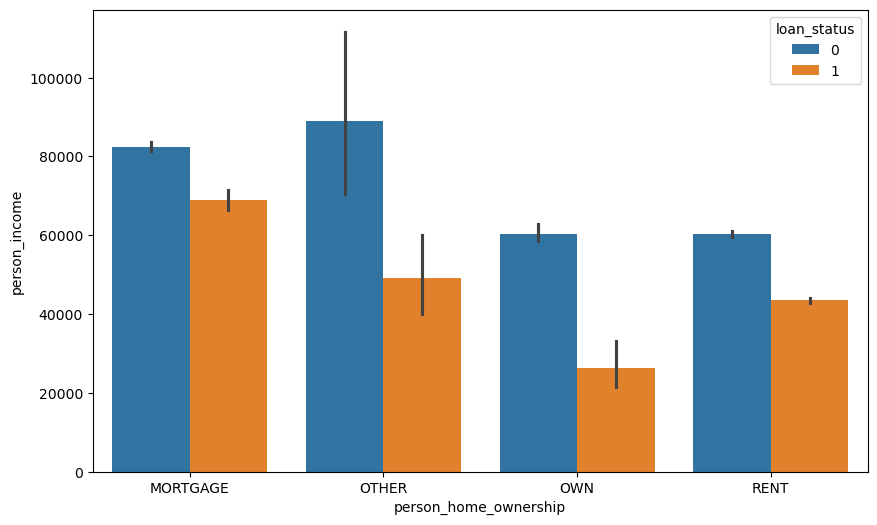

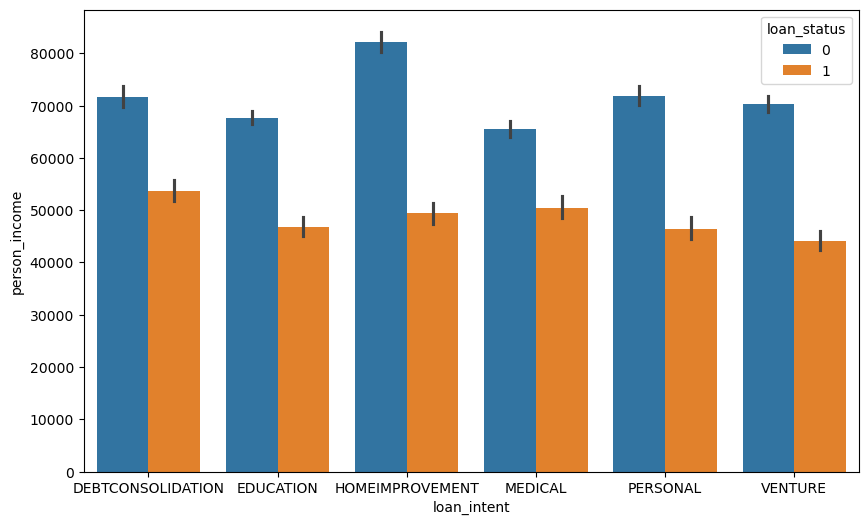

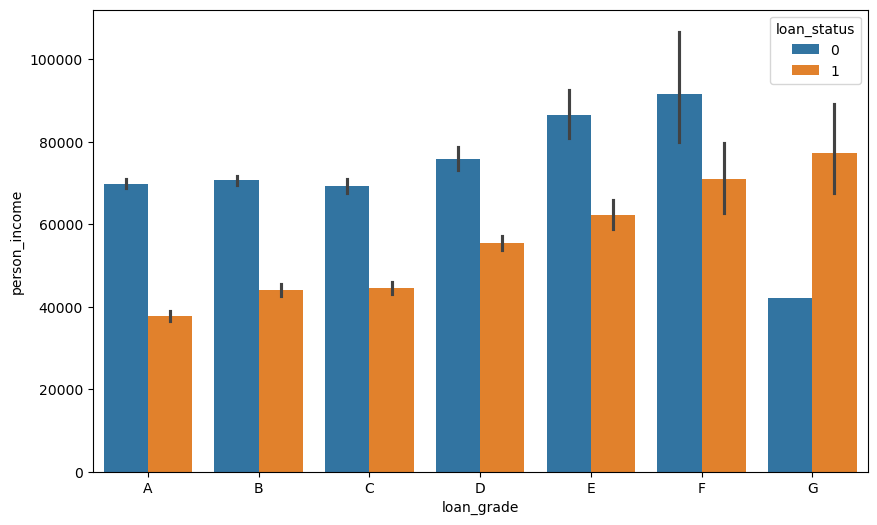

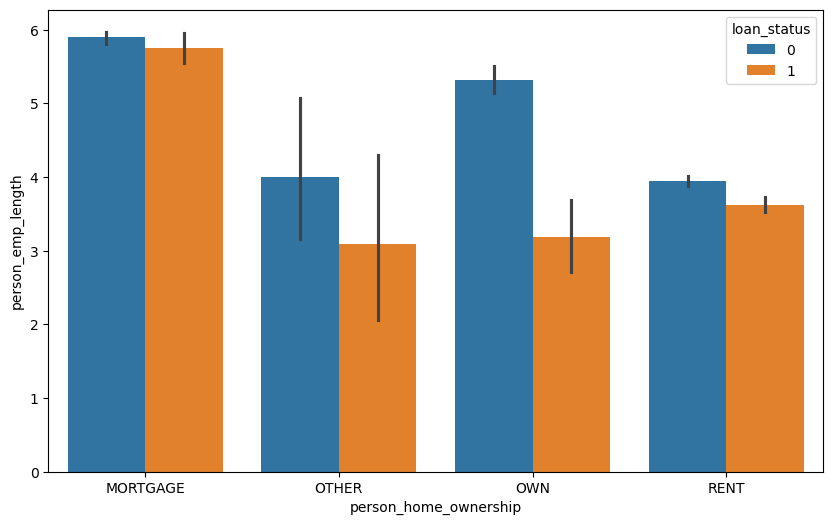

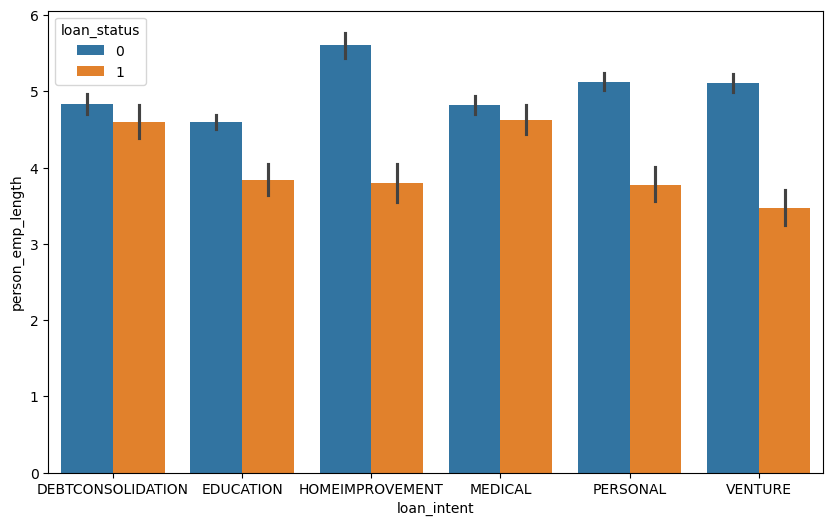

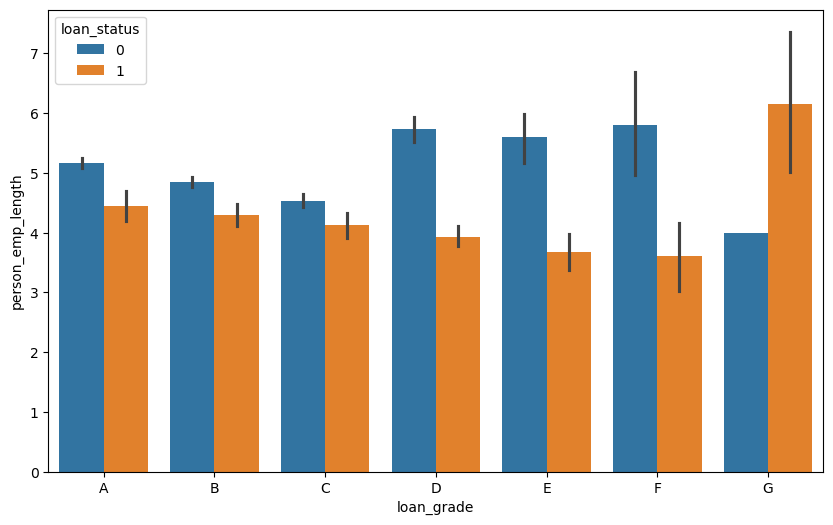

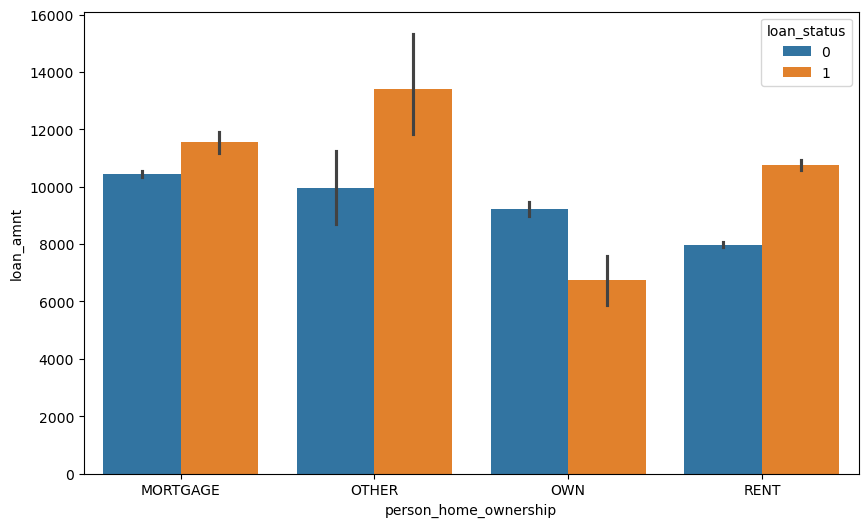

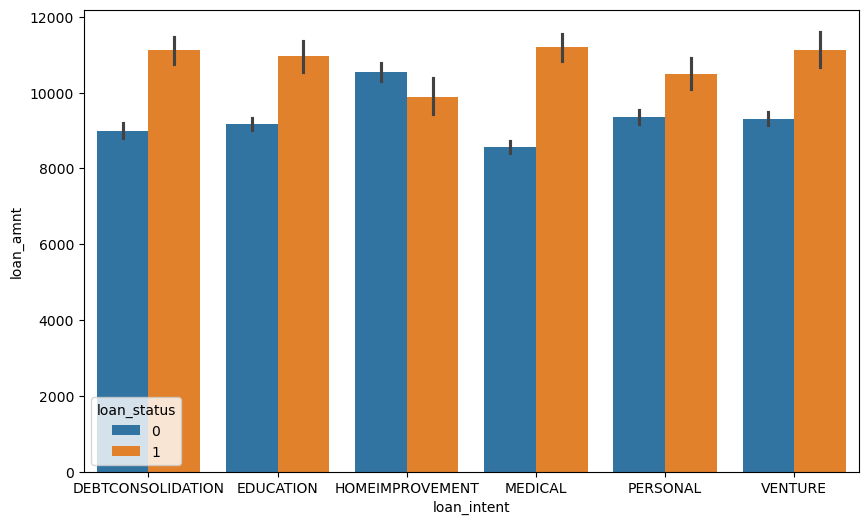

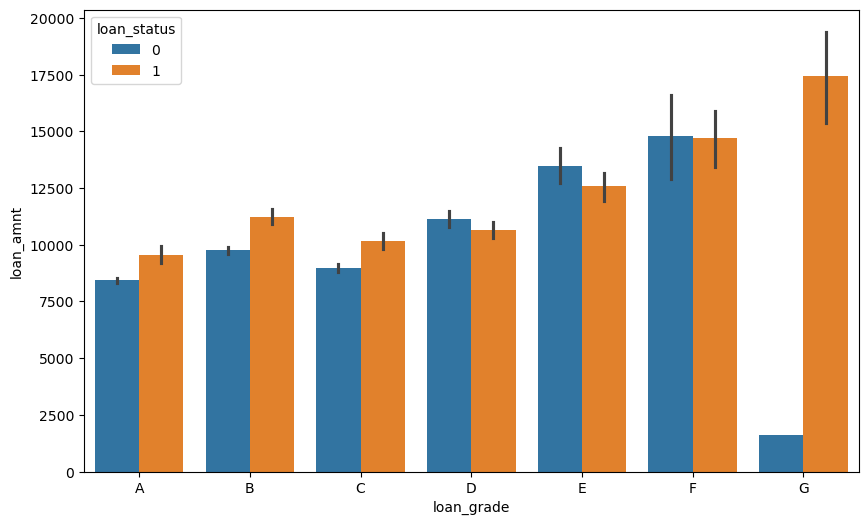

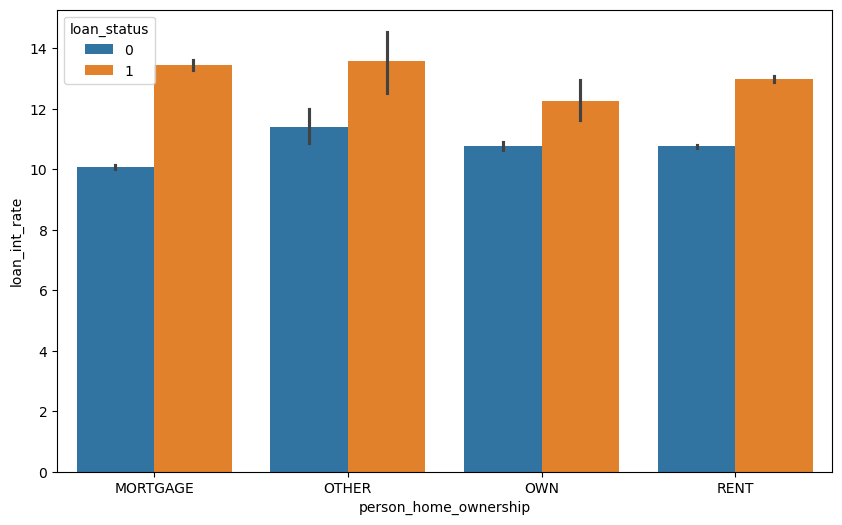

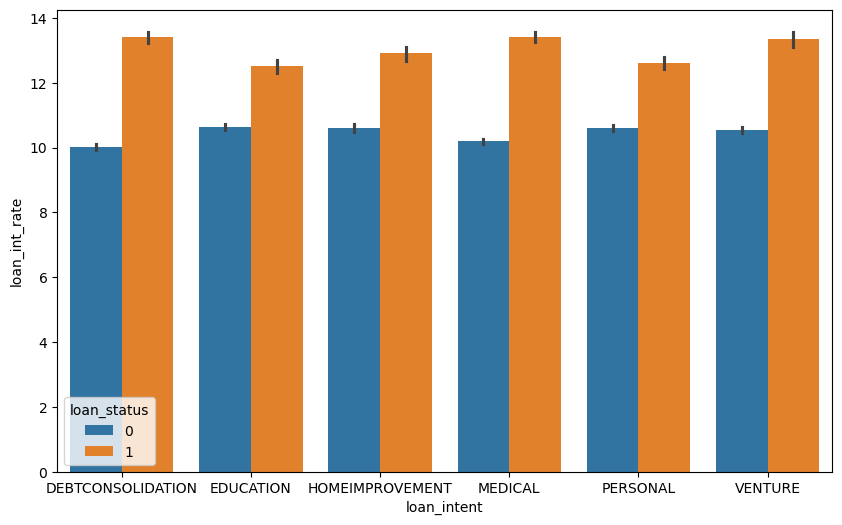

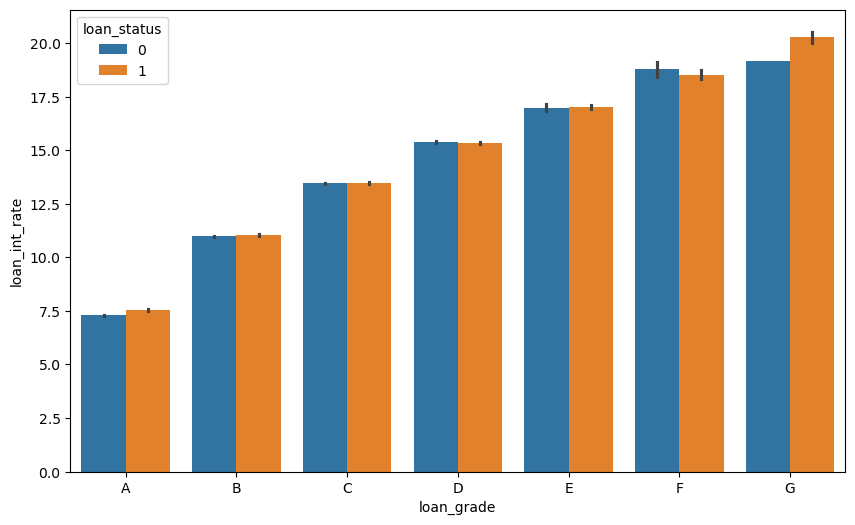

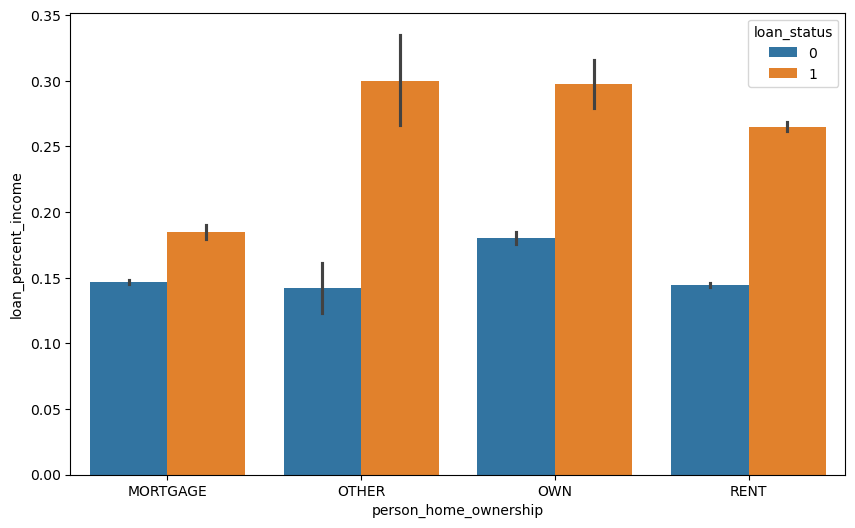

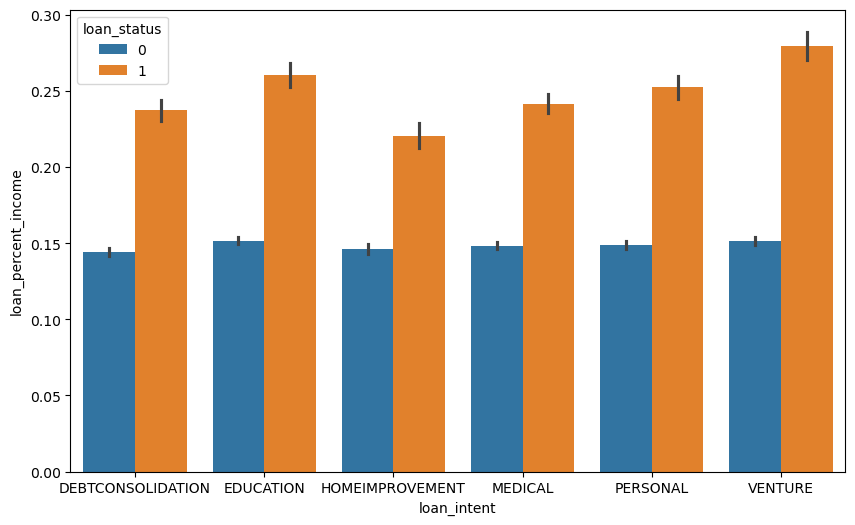

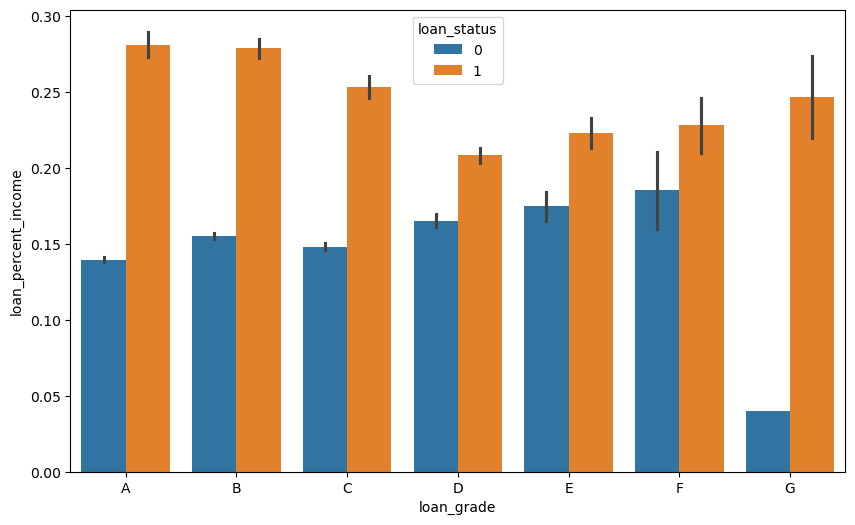

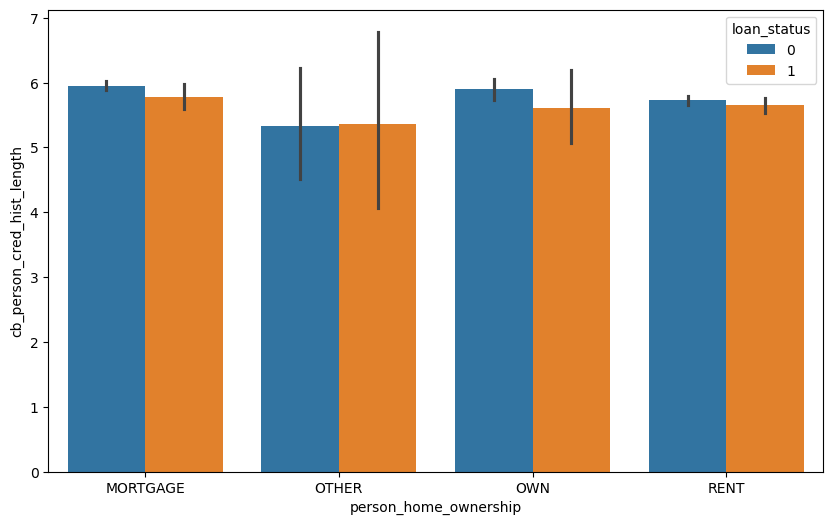

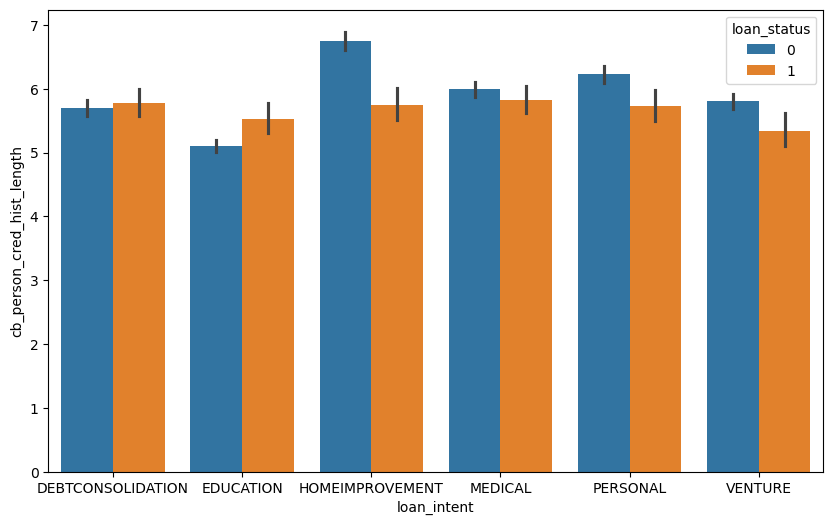

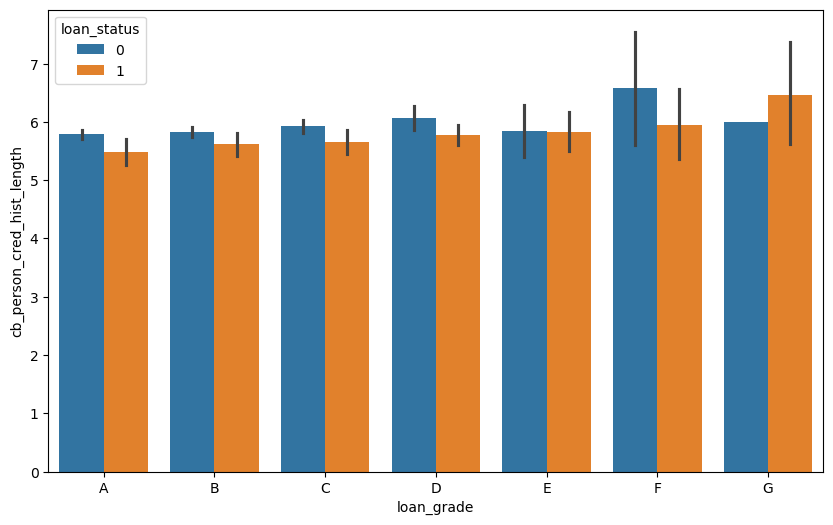

In [66]:
for numeric_feature in numeric_features:
    for categorical_feature in categorical_features:
        plt.figure(
            figsize=(10,6)
            )
        sns.barplot(
            data= credit_risk_dataset,
            x= categorical_feature,
            y= numeric_feature,
            hue= target
        )

C:\Users\billy\AppData\Local\Temp\ipykernel_37484\3649869933.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(


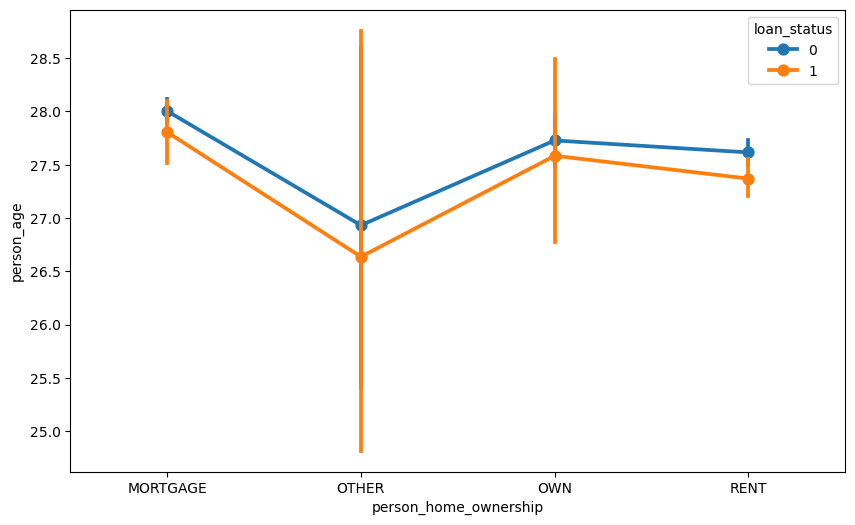

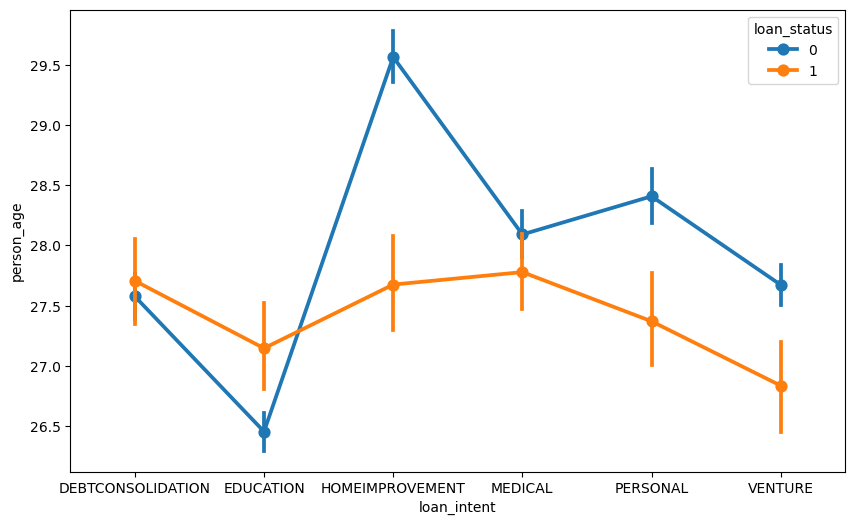

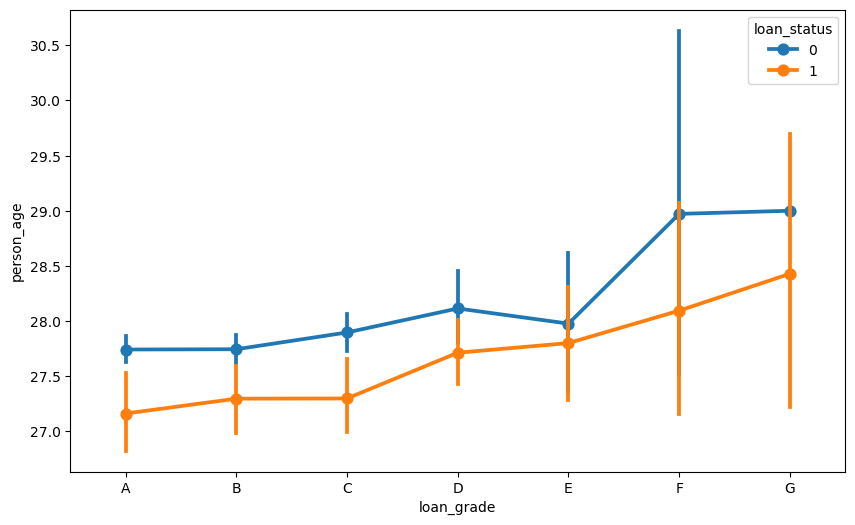

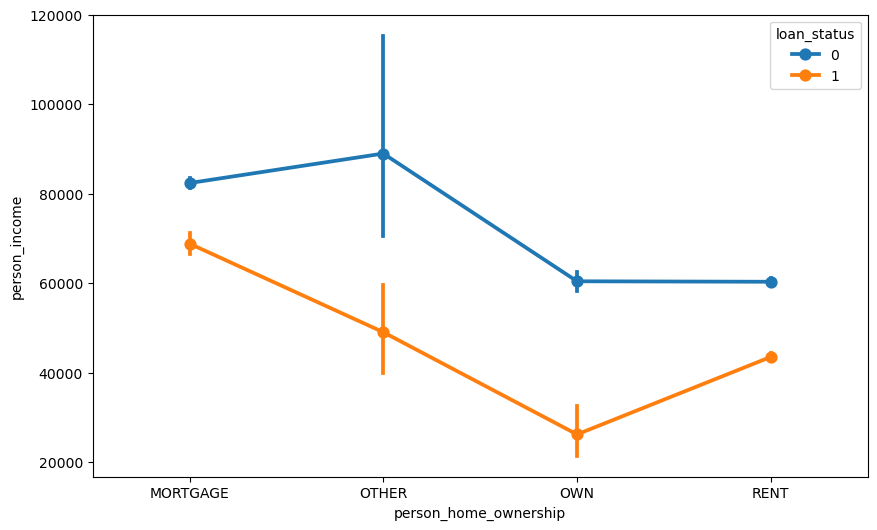

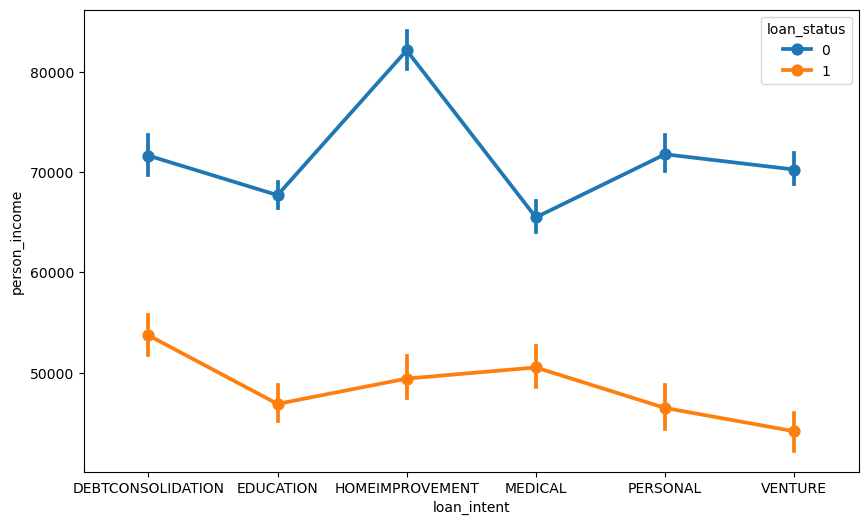

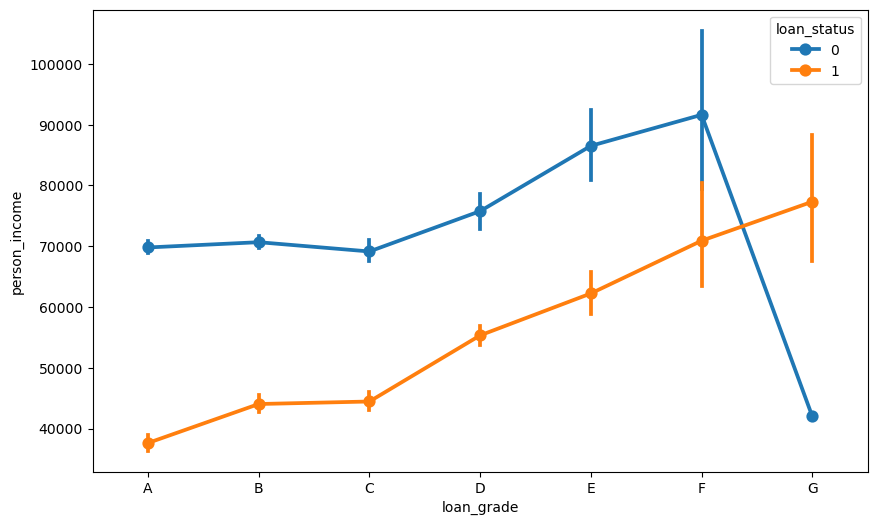

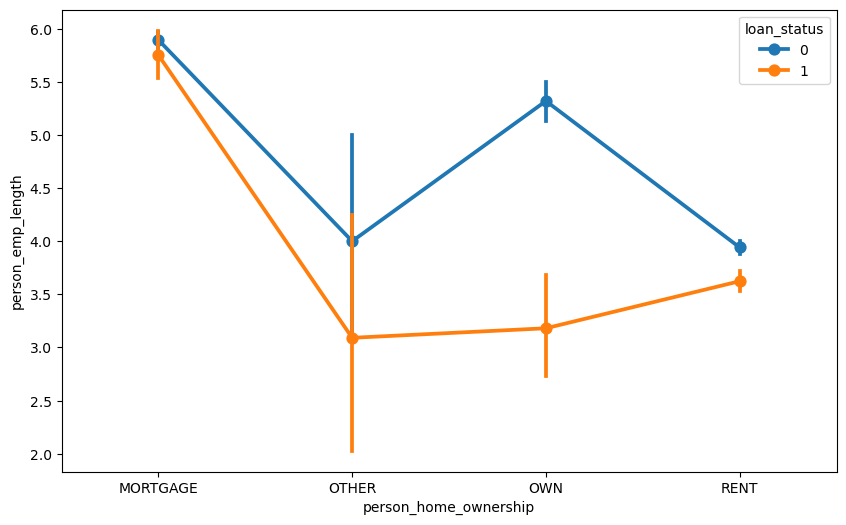

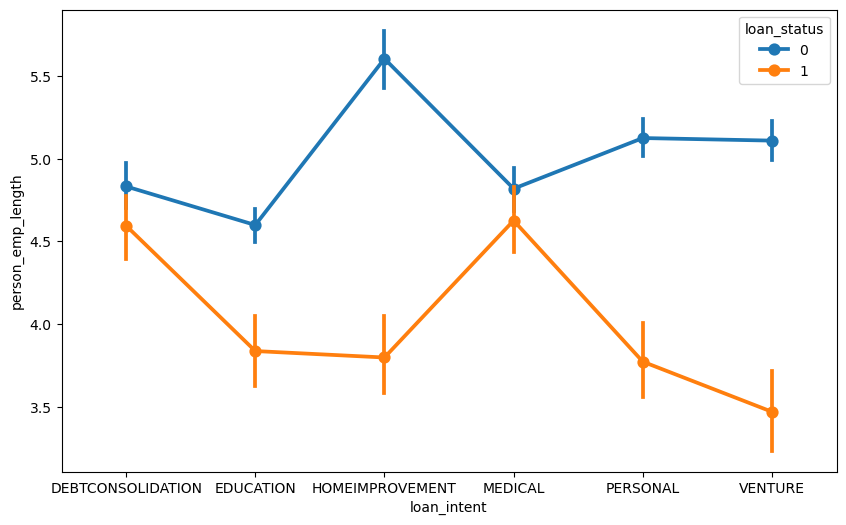

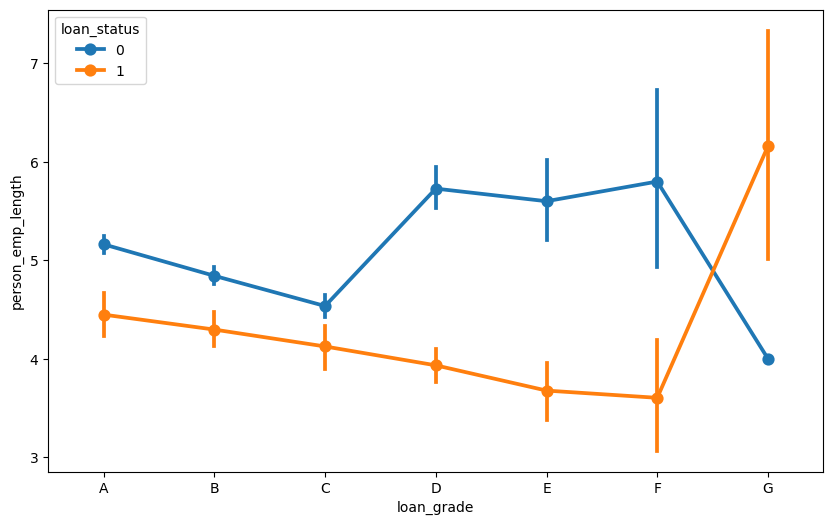

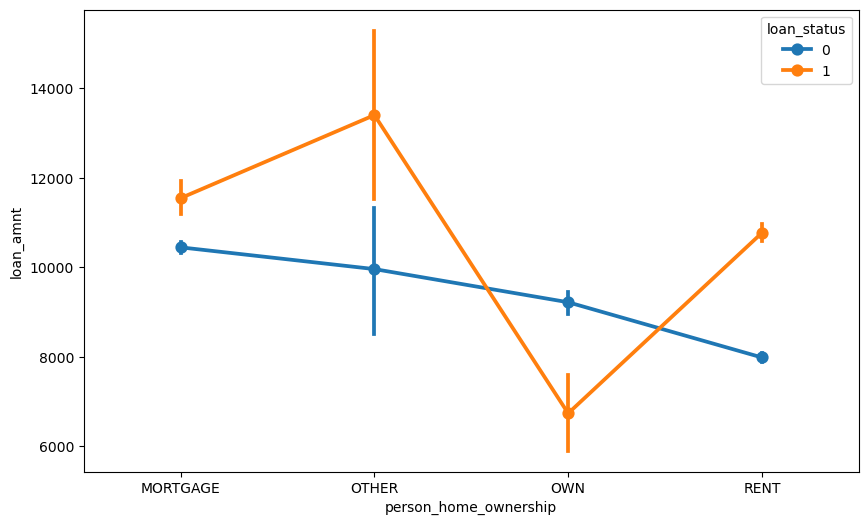

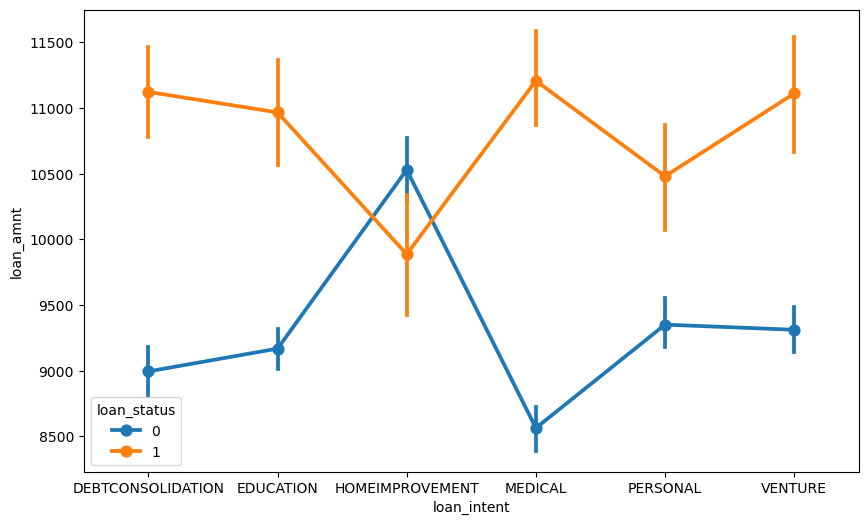

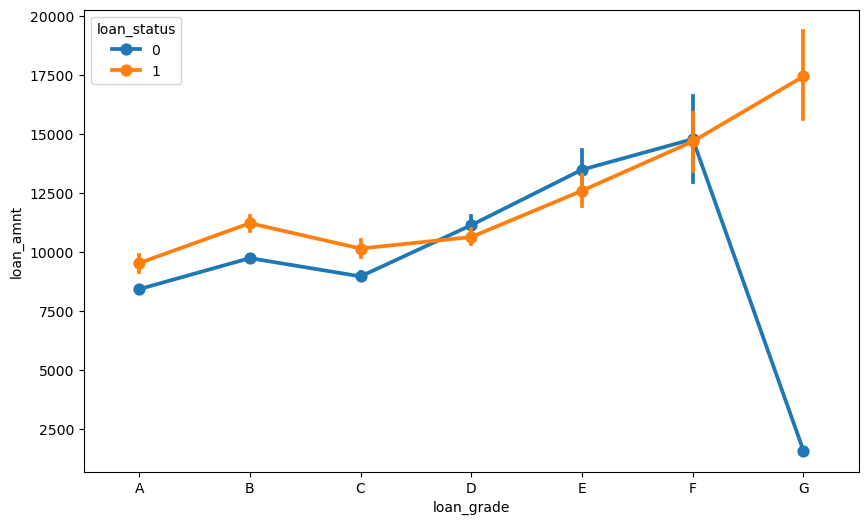

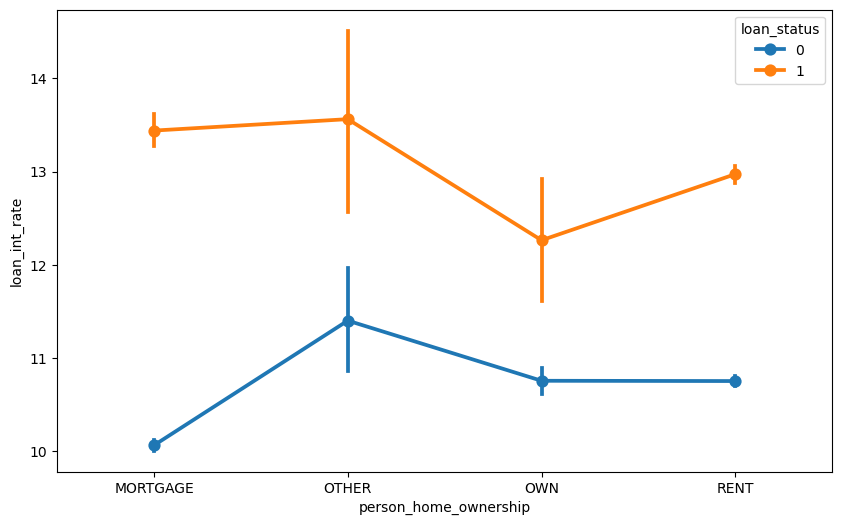

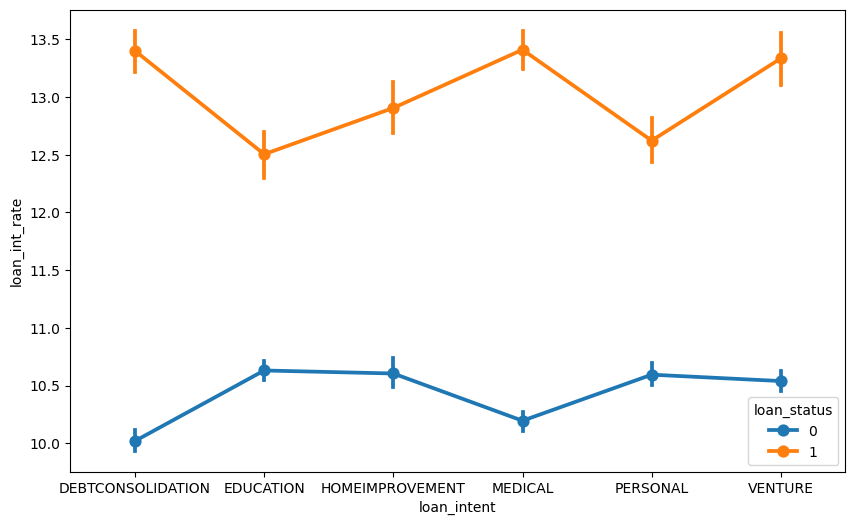

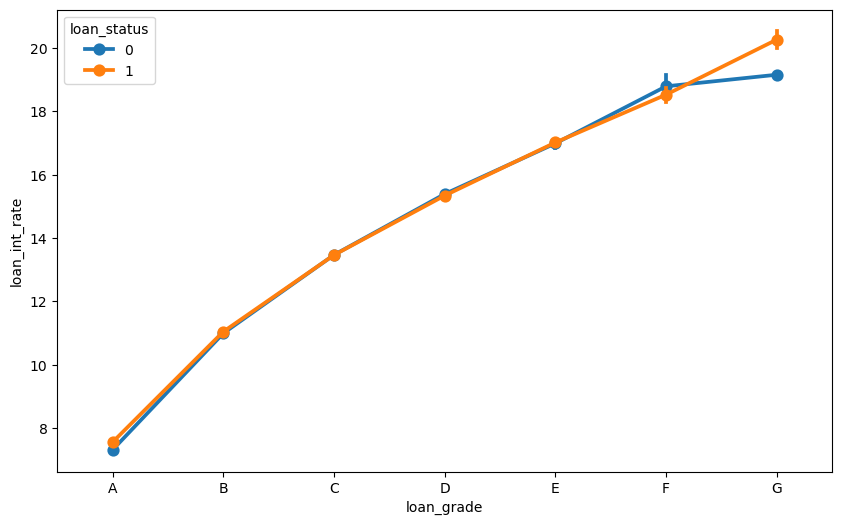

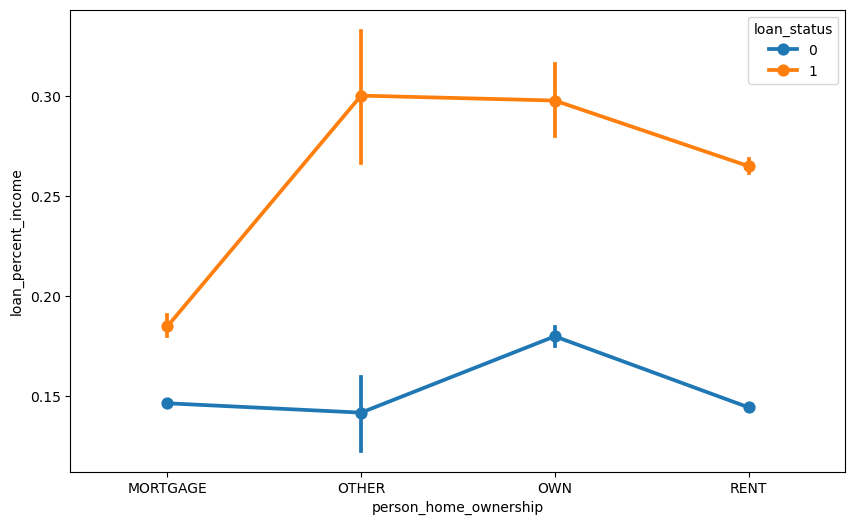

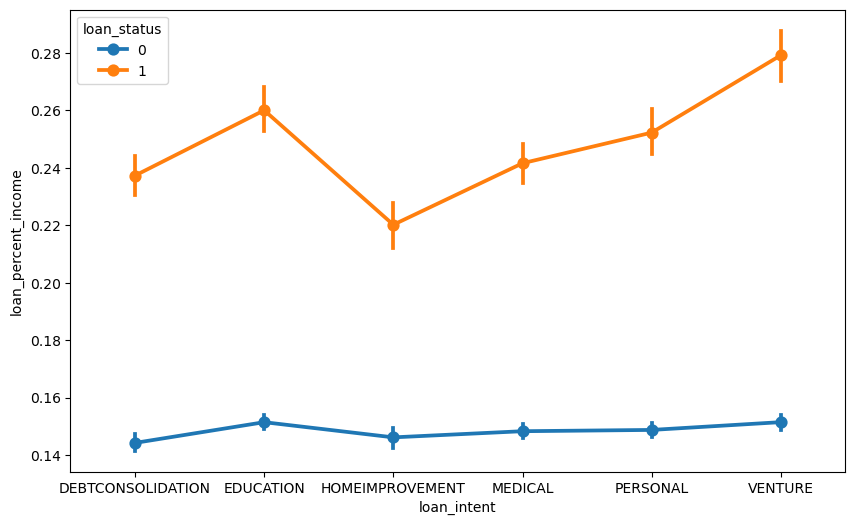

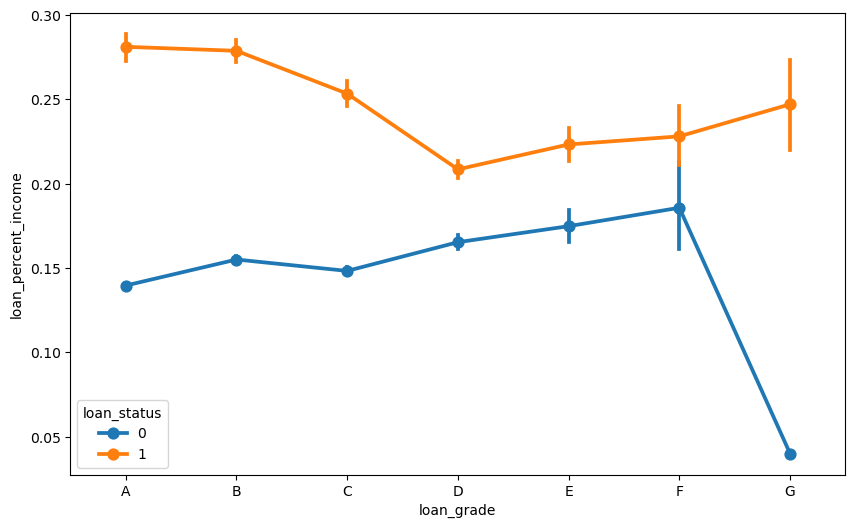

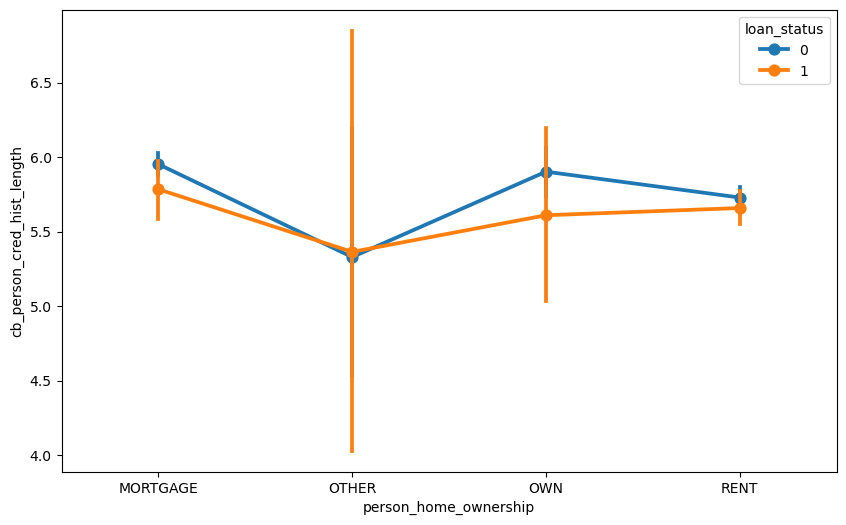

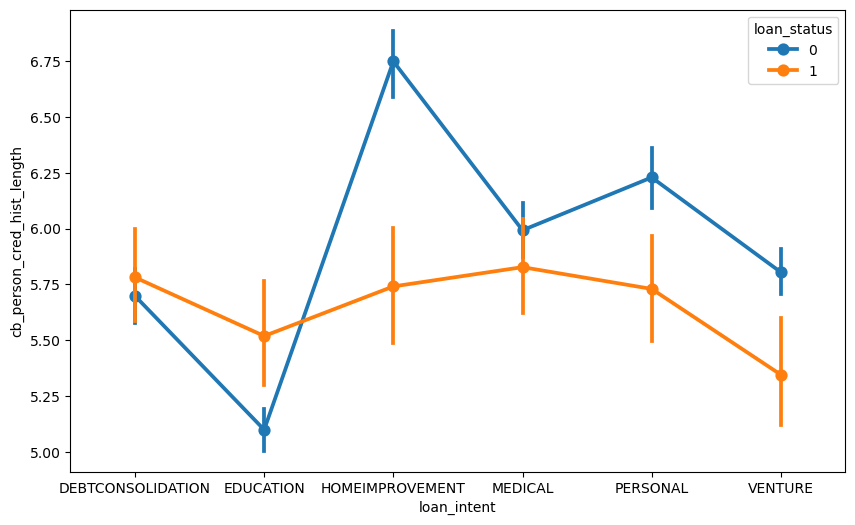

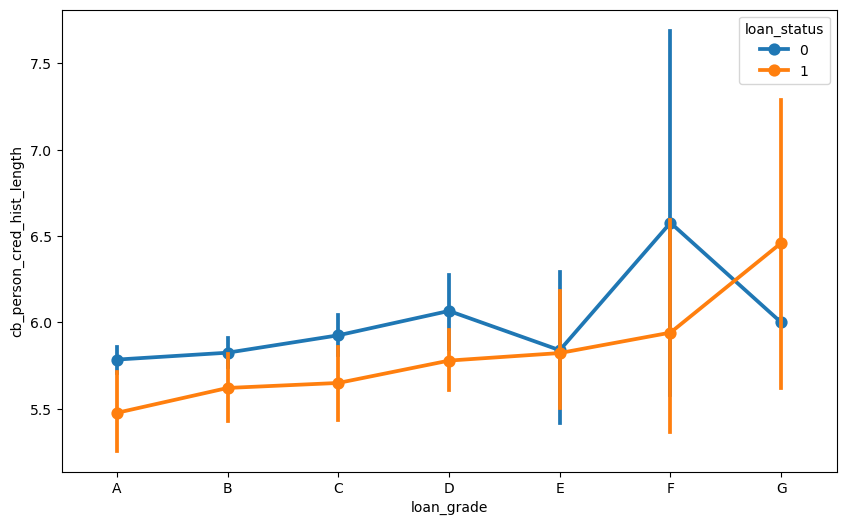

In [67]:
for numeric_feature in numeric_features:
    for categorical_feature in categorical_features:
        plt.figure(
            figsize=(10,6)
            )
        sns.pointplot(
            data= credit_risk_dataset,
            x= categorical_feature,
            y= numeric_feature,
            hue= target
        )

<Axes: >

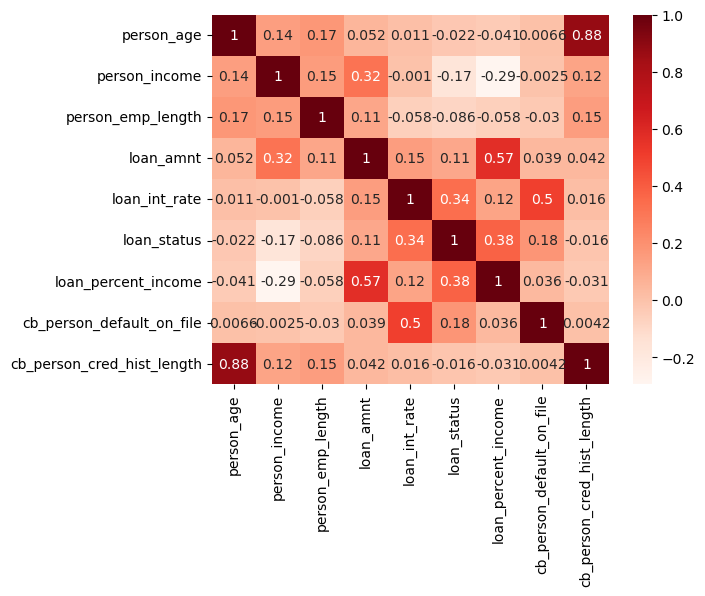

In [68]:
sns.heatmap(credit_risk_dataset.corr(numeric_only=True), annot=True, cmap ='Reds')

In [69]:
pd.crosstab(
  index= target,
  columns=  credit_risk_dataset.loan_intent,
  values= credit_risk_dataset.person_income,
  aggfunc= 'mean'
)

loan_intent  DEBTCONSOLIDATION     EDUCATION  HOMEIMPROVEMENT       MEDICAL  \
loan_status                                                                   
0                 71642.858957  67699.711673     82135.808968  65482.492655   
1                 53720.610215  46879.928571     49404.795745  50515.141620   

loan_intent      PERSONAL       VENTURE  
loan_status                              
0            71773.862139  70251.324716  
1            46475.580055  44152.992891

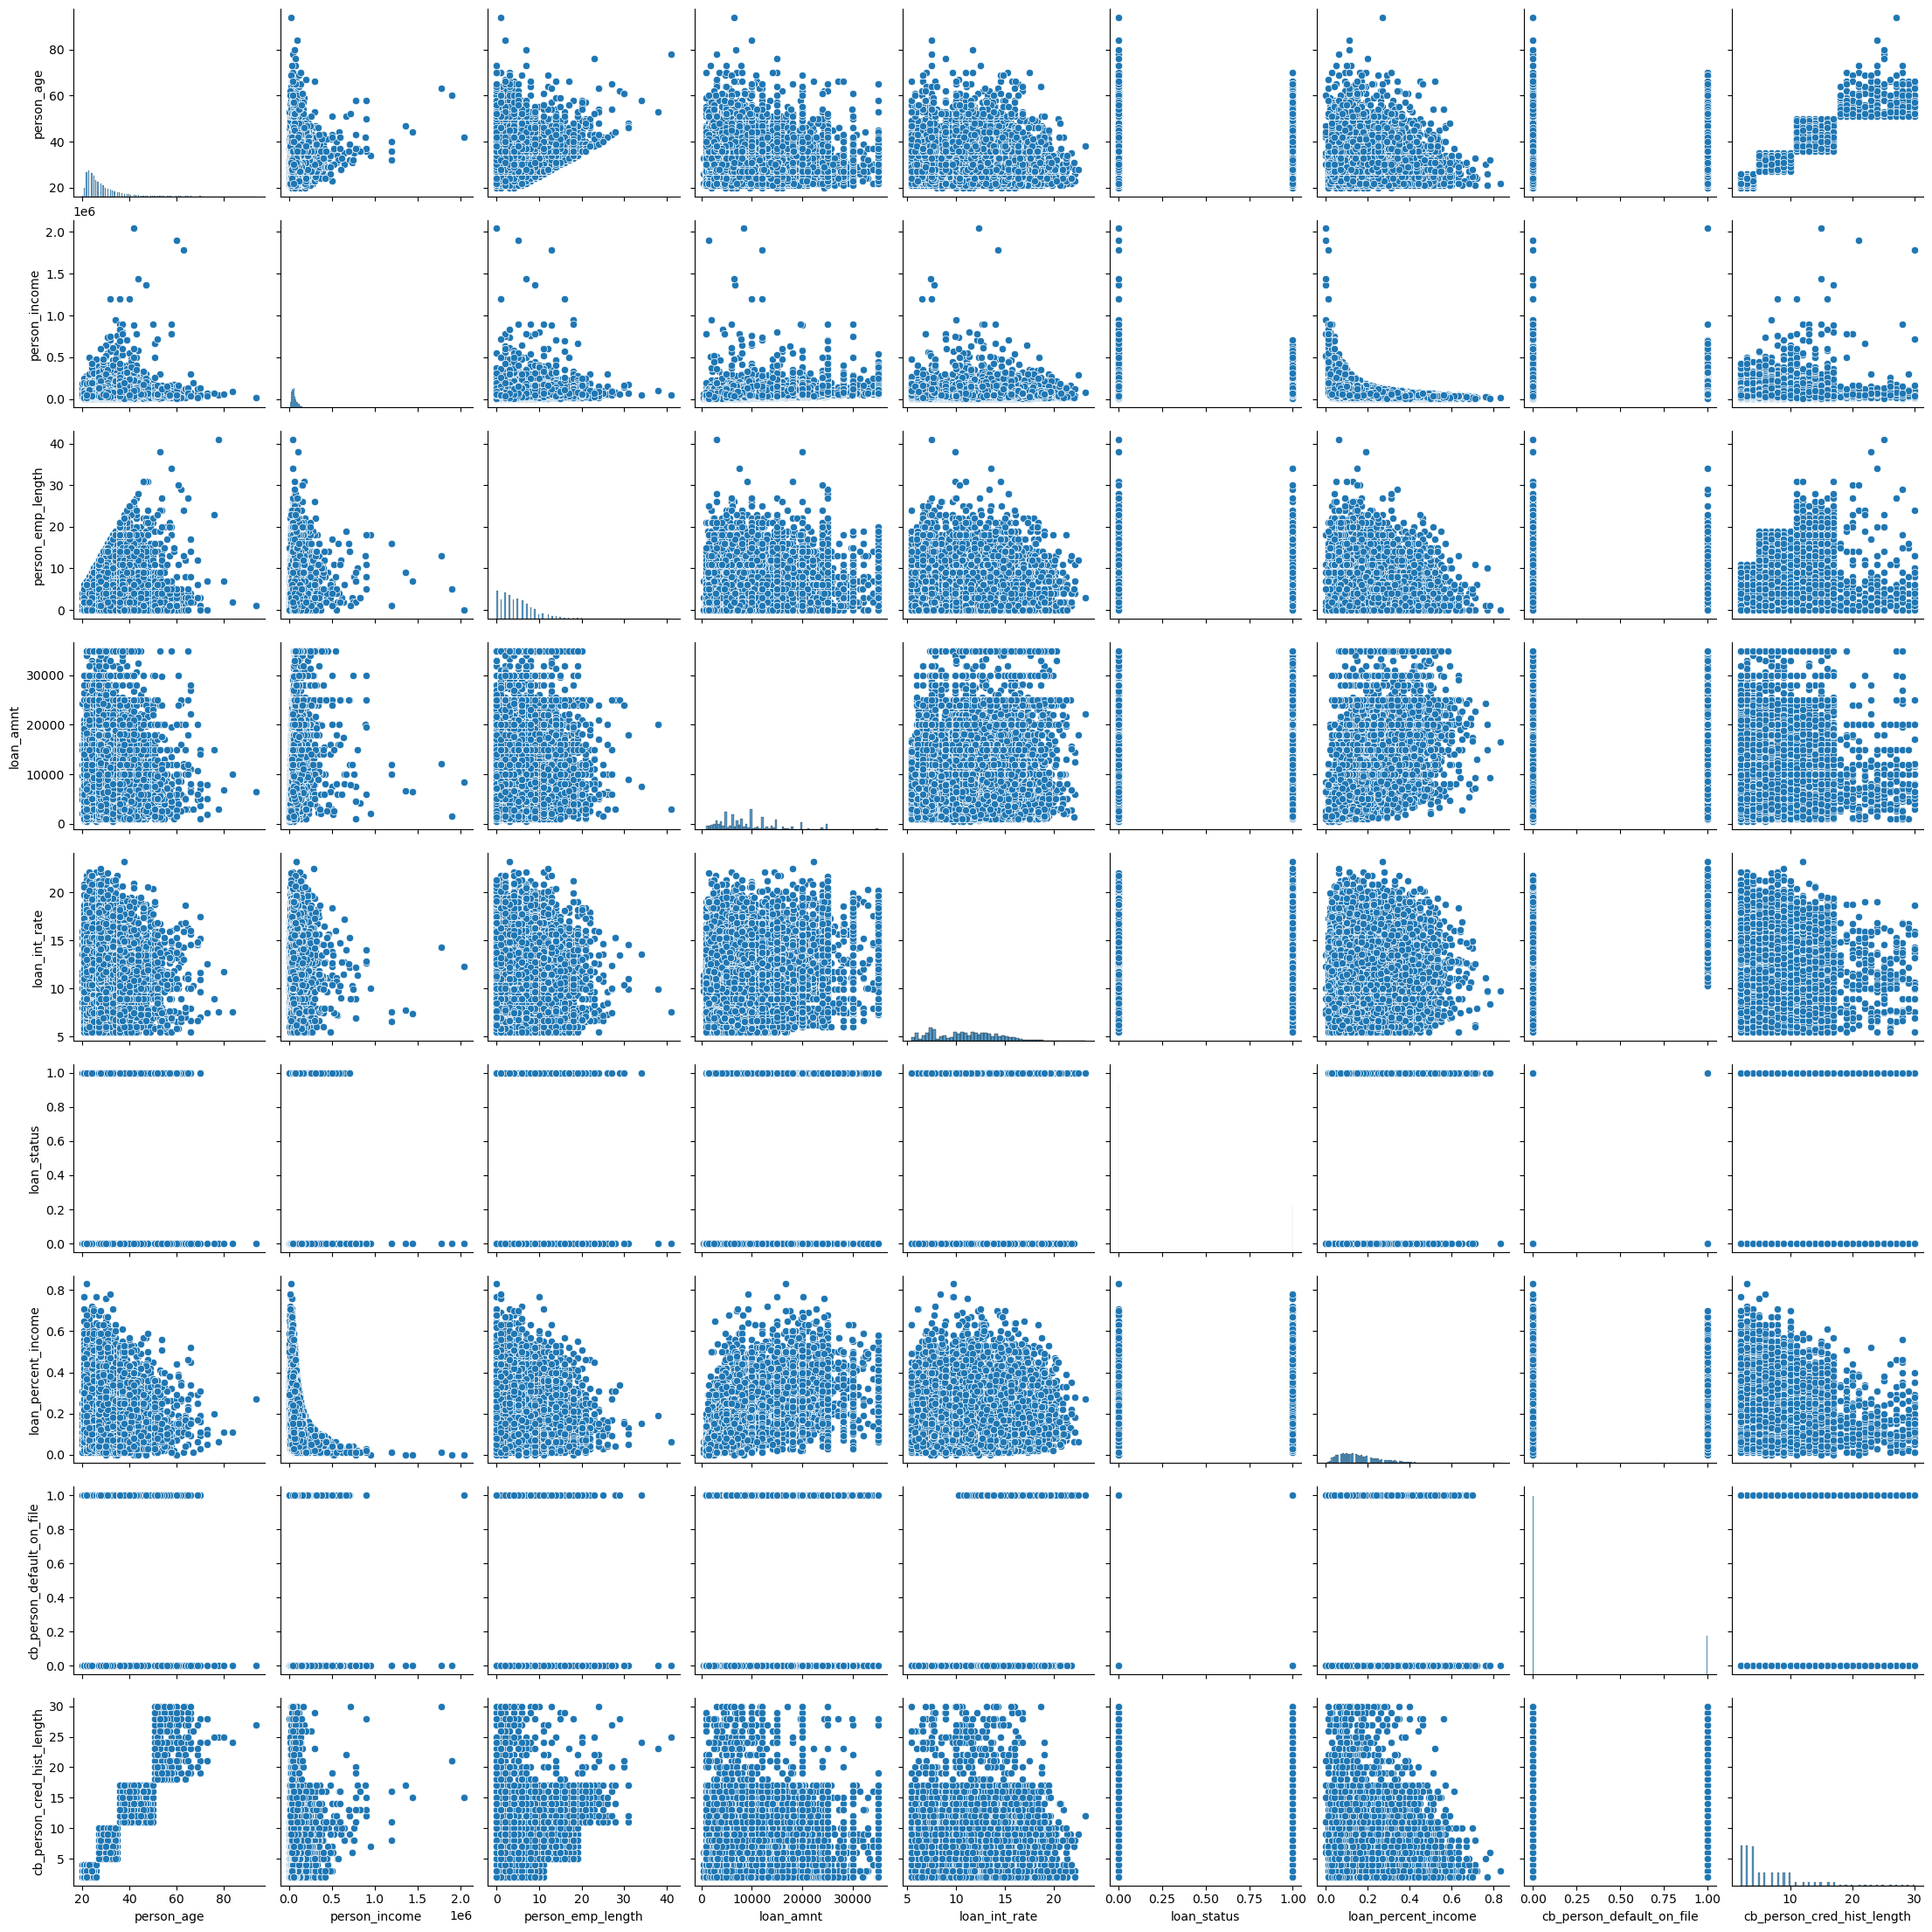

In [70]:
sns.pairplot(credit_risk_dataset)

### Boundaries

#### Age Boundaries

In [71]:
print("The oldest person is:", credit_risk_dataset['person_age'].max())

The oldest person is: 94


In [72]:
print("The youngest person is:", credit_risk_dataset['person_age'].min())

The youngest person is: 20


In [73]:
def age_groups(age_boundaries):
    boundaries_length = len(age_boundaries)
    for i in range(0, boundaries_length-1):
       first_boundary = age_boundaries[i]+1
       num_people = credit_risk_dataset['person_age'].between(first_boundary, age_boundaries[i+1]).sum()
       print(f"Age between {first_boundary} and {age_boundaries[i+1]}: Number of people {num_people}")

age_groups(range(0, 111, 10))

Age between 1 and 10: Number of people 0
Age between 11 and 20: Number of people 15
Age between 21 and 30: Number of people 24657
Age between 31 and 40: Number of people 6251
Age between 41 and 50: Number of people 1203
Age between 51 and 60: Number of people 218
Age between 61 and 70: Number of people 57
Age between 71 and 80: Number of people 6
Age between 81 and 90: Number of people 1
Age between 91 and 100: Number of people 1
Age between 101 and 110: Number of people 0


#### Income Boundaries

In [74]:
print("The maximum income", credit_risk_dataset.person_income.max())

The maximum income 2039784


In [75]:
print("The lowest income", credit_risk_dataset.person_income.min())

The lowest income 4000


In [76]:
def income_groups(income_boundaries):
    boundary_length = len(income_boundaries)
    for i in range(0, boundary_length-1):
        first_boundary = income_boundaries[i]+1
        num_people = credit_risk_dataset.person_income.between(first_boundary, income_boundaries[i+1]).sum()
        print(f"Incomes between {first_boundary} and {income_boundaries[i+1]}: Number of people {num_people}")
income_groups(range(0, 1000000, 50000))

Incomes between 1 and 50000: Number of people 13999
Incomes between 50001 and 100000: Number of people 14223
Incomes between 100001 and 150000: Number of people 3059
Incomes between 150001 and 200000: Number of people 685
Incomes between 200001 and 250000: Number of people 212
Incomes between 250001 and 300000: Number of people 95
Incomes between 300001 and 350000: Number of people 35
Incomes between 350001 and 400000: Number of people 24
Incomes between 400001 and 450000: Number of people 14
Incomes between 450001 and 500000: Number of people 12
Incomes between 500001 and 550000: Number of people 7
Incomes between 550001 and 600000: Number of people 7
Incomes between 600001 and 650000: Number of people 6
Incomes between 650001 and 700000: Number of people 2
Incomes between 700001 and 750000: Number of people 5
Incomes between 750001 and 800000: Number of people 8
Incomes between 800001 and 850000: Number of people 2
Incomes between 850001 and 900000: Number of people 5
Incomes between

#### Loan Amount Boundaries

In [77]:
def loan_groups(loan_boundaries):
    boundary_length = len(loan_boundaries)
    for i in range(0, boundary_length-1):
        first_boundary = loan_boundaries[i]
        num_people = credit_risk_dataset.loan_amnt.between(first_boundary, loan_boundaries[i+1]).sum()
        print(f"Loan Amount between {first_boundary} and {loan_boundaries[i+1]}: Number of people {num_people}")
loan_groups(range(0, 100000, 5000))

Loan Amount between 0 and 5000: Number of people 9428
Loan Amount between 5000 and 10000: Number of people 14014
Loan Amount between 10000 and 15000: Number of people 8740
Loan Amount between 15000 and 20000: Number of people 4277
Loan Amount between 20000 and 25000: Number of people 2691
Loan Amount between 25000 and 30000: Number of people 1035
Loan Amount between 30000 and 35000: Number of people 321
Loan Amount between 35000 and 40000: Number of people 183
Loan Amount between 40000 and 45000: Number of people 0
Loan Amount between 45000 and 50000: Number of people 0
Loan Amount between 50000 and 55000: Number of people 0
Loan Amount between 55000 and 60000: Number of people 0
Loan Amount between 60000 and 65000: Number of people 0
Loan Amount between 65000 and 70000: Number of people 0
Loan Amount between 70000 and 75000: Number of people 0
Loan Amount between 75000 and 80000: Number of people 0
Loan Amount between 80000 and 85000: Number of people 0
Loan Amount between 85000 and 9

### Export

In [78]:
credit_risk_dataset.to_csv(
    path_or_buf = "../data/interim/credit_risk_dataset_prepped.csv",
    index=False
)